In [1]:
import os
from fastai import *
from fastai.vision import *
from fastai.callbacks import *
import numpy as np
import pandas as pd
pd.options.display.max_rows = 999

### Modifying the the Test-Train CSV to work with fastai

In [2]:
df_Test_Train = pd.read_csv('cropped_test_train.csv')
df_Test_Train.drop(df_Test_Train.columns[df_Test_Train.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df_Test_Train = df_Test_Train.drop(columns=['index'])
df_Test_Train.head(100)

,Crp_Filepath,clutch,Day,egg_number,sex
0,./Cropped_Egg_images/Clutch1_D18/egg2.JPG,1,18,2,Female
1,./Cropped_Egg_images/Clutch1_D18/egg3.JPG,1,18,3,Female
2,./Cropped_Egg_images/Clutch1_D18/egg4.JPG,1,18,4,Male
3,./Cropped_Egg_images/Clutch1_D18/egg6.JPG,1,18,6,Female
4,./Cropped_Egg_images/Clutch1_D18/egg9.JPG,1,18,9,Female
5,./Cropped_Egg_images/Clutch1_D18/egg11.JPG,1,18,11,Female
6,./Cropped_Egg_images/Clutch1_D18/egg15.JPG,1,18,15,Female
7,./Cropped_Egg_images/Clutch1_D18/egg16.JPG,1,18,16,Male
8,./Cropped_Egg_images/Clutch1_D18/egg17.JPG,1,18,17,Female
9,./Cropped_Egg_images/Clutch1_D18/egg19.JPG,1,18,19,Male


In [3]:
def dropdot(row):
    filepath = row['Crp_Filepath']
    newfilepath = filepath.split('./')[1]
    return newfilepath

df_Test_Train['Crp_Filepath'] = df_Test_Train.apply(dropdot, axis =1)

#Get just the D18
df_Test_Train = df_Test_Train[df_Test_Train['Day']==14]
df_Test_Train = df_Test_Train.reset_index()
df_Test_Train = df_Test_Train.drop(columns = ['index'])

df_Test_Train.head()

df_Test_Train.to_csv('Fastai_dataset_usable_d14.csv')

In [4]:
df_Test_Train.head(100)

,Crp_Filepath,clutch,Day,egg_number,sex
0,Cropped_Egg_images/Clutch2_D14/IMG_0002.JPG,2,14,1,Female
1,Cropped_Egg_images/Clutch2_D14/IMG_0003.JPG,2,14,2,Male
2,Cropped_Egg_images/Clutch2_D14/IMG_0007.JPG,2,14,6,Female
3,Cropped_Egg_images/Clutch2_D14/IMG_0008.JPG,2,14,7,Female
4,Cropped_Egg_images/Clutch2_D14/IMG_0010.JPG,2,14,9,Male
5,Cropped_Egg_images/Clutch2_D14/IMG_0013.JPG,2,14,12,Male
6,Cropped_Egg_images/Clutch2_D14/IMG_0014.JPG,2,14,13,Female
7,Cropped_Egg_images/Clutch2_D14/IMG_0016.JPG,2,14,15,Female
8,Cropped_Egg_images/Clutch2_D14/IMG_0018.JPG,2,14,17,Female
9,Cropped_Egg_images/Clutch2_D14/IMG_0022.JPG,2,14,21,Female


# Initial testing

In [165]:
np.random.seed(42)
data = ImageDataBunch.from_df('/home/jplineb/Chicken_Proj', df_Test_Train, label_col = 'sex', size = (252,224), bs = 2, valid_pct=0.20, ds_tfms = None)


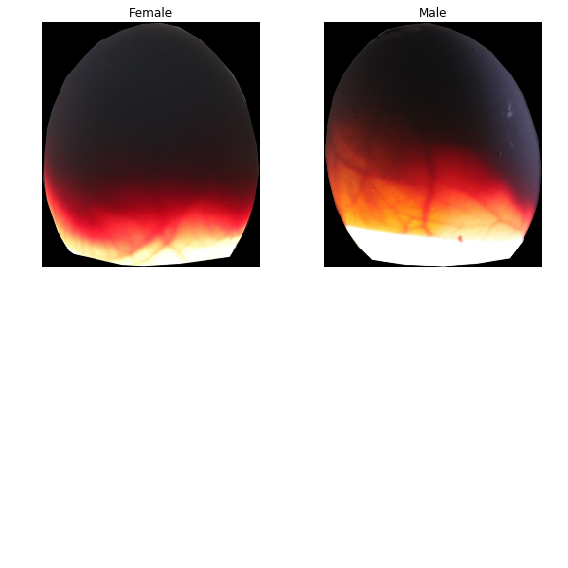

In [166]:
data.show_batch()

In [164]:
data.batch_stats

<bound method ImageDataBunch.batch_stats of ImageDataBunch;

Train: LabelList (76 items)
x: ImageList
Image (3, 224, 252),Image (3, 224, 252),Image (3, 224, 252),Image (3, 224, 252),Image (3, 224, 252)
y: CategoryList
Female,Male,Female,Female,Female
Path: /home/jplineb/Chicken_Proj;

Valid: LabelList (18 items)
x: ImageList
Image (3, 224, 252),Image (3, 224, 252),Image (3, 224, 252),Image (3, 224, 252),Image (3, 224, 252)
y: CategoryList
Female,Female,Female,Female,Female
Path: /home/jplineb/Chicken_Proj;

Test: None>

In [174]:
# Attempting to use CSVLogger callback
learn = cnn_learner(data, models.resnet34, metrics = error_rate, wd=10, callback_fns=[CSVLogger])

epoch,train_loss,valid_loss,error_rate,time
0,0.868182,1.010944,0.611111,00:02
1,0.771957,0.717360,0.611111,00:02
2,0.722283,0.702474,0.722222,00:02
3,0.704669,0.696288,0.666667,00:02
4,0.697446,0.695262,0.666667,00:02
5,0.694409,0.695622,0.666667,00:02


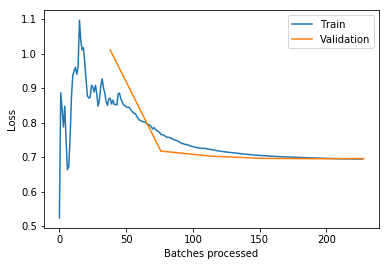

In [175]:
learn.fit_one_cycle(6)
learn.recorder.plot_losses()

In [176]:
# CSVLogger callback testing
df_history = pd.read_csv('history.csv')
df_history.head()

,epoch,train_loss,valid_loss,error_rate,time
0,0,0.868182,1.010944,0.611111,NaN
1,1,0.771957,0.717360,0.611111,NaN
2,2,0.722283,0.702474,0.722222,NaN
3,3,0.704669,0.696288,0.666667,NaN
4,4,0.697446,0.695262,0.666667,NaN


In [178]:
df_history.error_rate.max()

0.722222

In [191]:
## Testing dataframe creation ##
DFBig = pd.DataFrame(columns = ['model_arch', 'transforms', 'normalized', 'weight_decay', 'max_error', 'min_error', 'avg_error', 'train_df'])
DFBig = DFBig.append({'model_arch': 'resnet34',
             'transforms': 'None',
             'normalized': 'False',
             'weight_decay': int(10),
             'max_error' : df_history.error_rate.max(),
             'min_error': df_history.error_rate.min(),
             'avg_error': df_history.error_rate.mean(),
             'train_df': df_history}, ignore_index = True)

,epoch,train_loss,valid_loss,error_rate,time
0,0,0.868182,1.010944,0.611111,NaN
1,1,0.771957,0.717360,0.611111,NaN
2,2,0.722283,0.702474,0.722222,NaN
3,3,0.704669,0.696288,0.666667,NaN
4,4,0.697446,0.695262,0.666667,NaN
5,5,0.694409,0.695622,0.666667,NaN


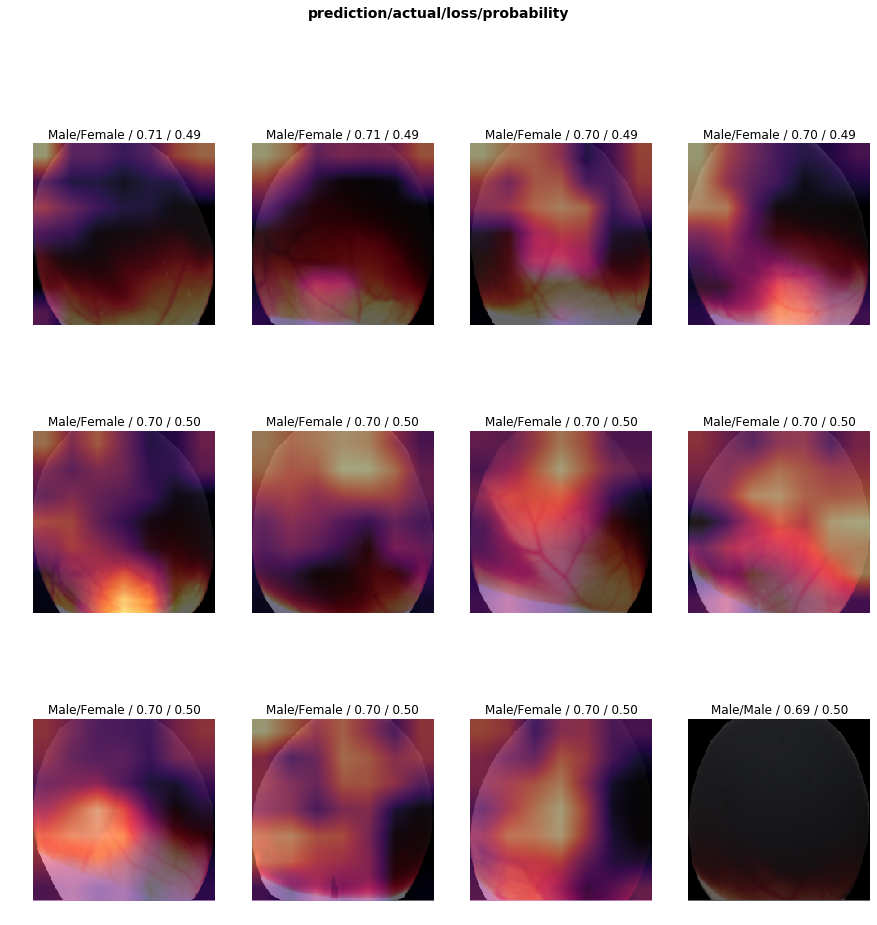

In [115]:
interp = ClassificationInterpretation.from_learner(learn)

interp.plot_top_losses(12, figsize=(15,15))

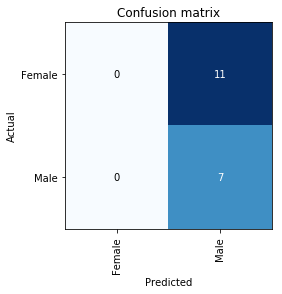

In [196]:
alpha = interp.plot_confusion_matrix(return_fig=True).savefig('test.png')

## For Loop 

In [ ]:
### A Function to test multiple parameters for training fastai models  ## Second Technique
'''
Things we want to vary:
    Model Architecture,Transforms,Normalization,Weight Decay
Things we want to store:
    Training Results, lowest error, individual model(unfrozen), confusion matrix
'''

# Parameters to very
modelarch = [models.resnet18, models.resnet34, models.resnet50]
transforms = [None, get_transforms()]
normalization = [True, False]
weight_decay = [.01, .1, 1, 10, 20]
epoch_cycles = 7

# Creating Frame Work
DFBig = pd.DataFrame(columns = ['model_arch', 'transforms', 'normalized', 'weight_decay', 'max_error', 'min_error', 'avg_error', 'train_df'])
np.random.seed(42)
for trans in transforms:
    for norm in normalization:
        if norm:
            data = ImageDataBunch.from_df('/home/jplineb/Chicken_Proj', df_Test_Train, label_col = 'sex', size = 224, bs = 2, valid_pct=0.20, ds_tfms = trans).normalize()
        else:
            data = ImageDataBunch.from_df('/home/jplineb/Chicken_Proj', df_Test_Train, label_col = 'sex', size = 224, bs = 2, valid_pct=0.20, ds_tfms = trans)
        for arch in modelarch:
            archstr = str(arch).split(' ')[1]
            for wd in weight_decay:
                if trans is not None:
                    trans = 'stock'
                test_name =  archstr + '_' + str(trans) + '_' + str(norm) + '_' + str(wd)
                learn = cnn_learner(data, arch, metrics = error_rate, wd=wd, callback_fns=[CSVLogger])
                learn.fit_one_cycle(epoch_cycles)
                learn.save(test_name)
                df_history = pd.read_csv('history.csv')
                DFBig = DFBig.append({'model_arch': archstr,
                                      'transforms': str(trans),
                                      'normalized': str(norm),
                                      'weight_decay': wd,
                                      'max_error' : df_history.error_rate.max(),
                                      'min_error': df_history.error_rate.min(),
                                      'avg_error': df_history.error_rate.mean(),
                                      'train_df': df_history}, ignore_index = True)
                interp = ClassificationInterpretation.from_learner(learn)
                interp.plot_confusion_matrix(return_fig=True)#.savefig(('./matrices/' + test_name + '.png'))
                DFBig.to_csv('DF_Big.csv')

            


Results from this test found Resnet50 and Resnet34 needed further testing
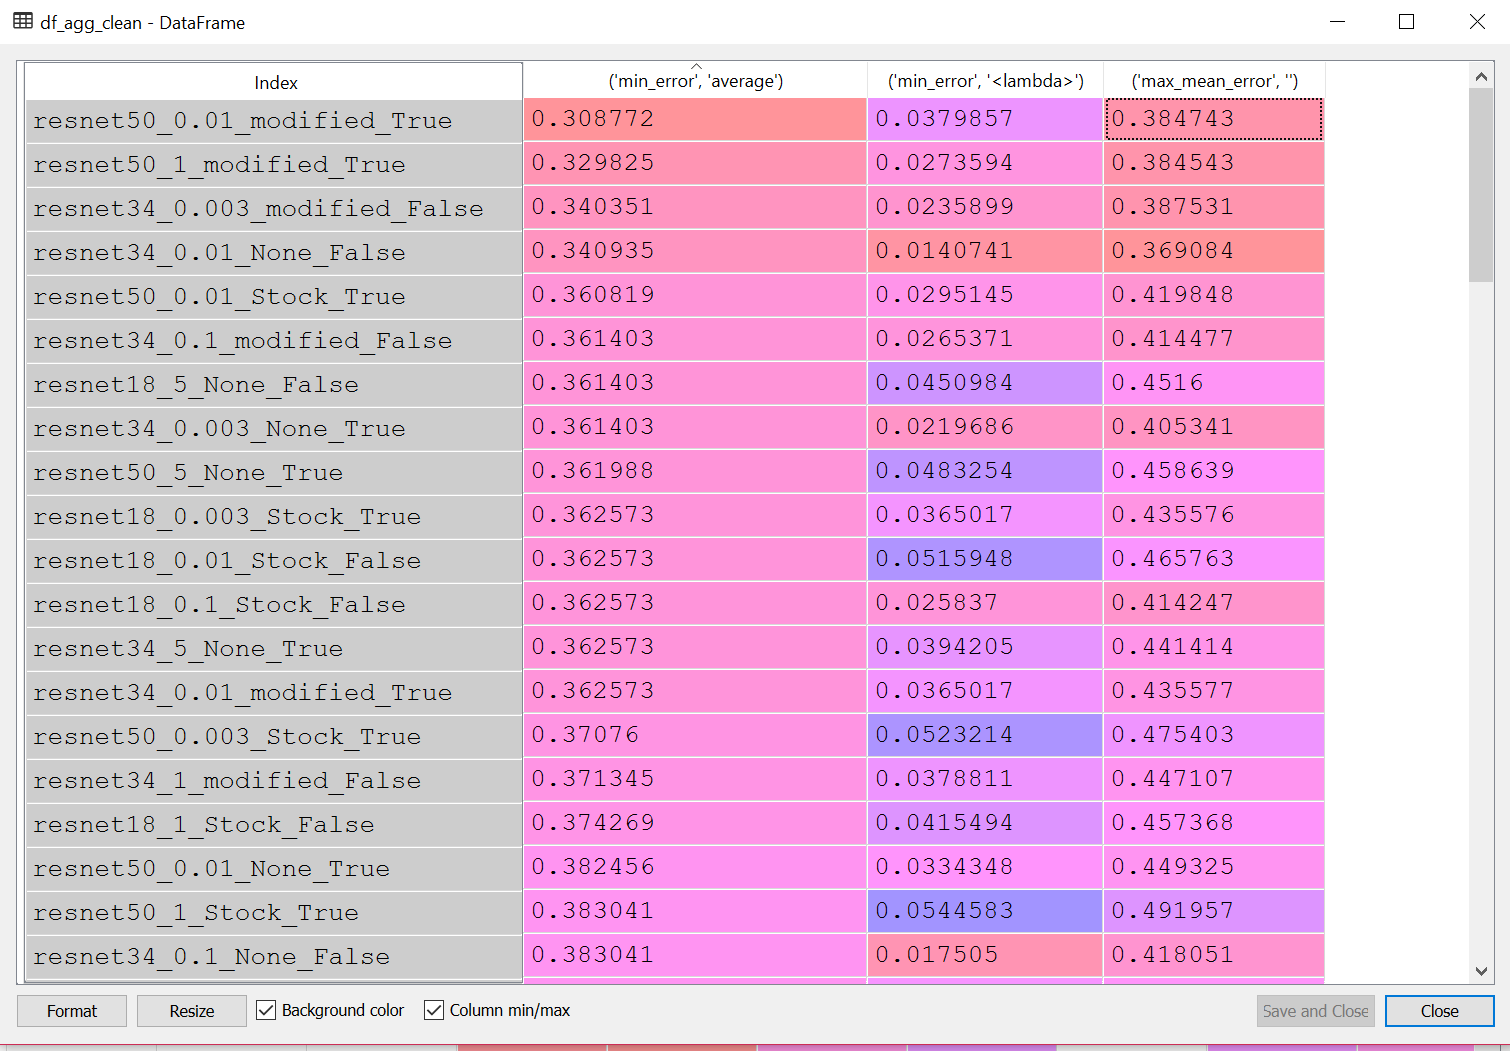

For Further testing of these parameters look at:
[Repeated Stratified K Fold on "Good" hyperparametrs](Repeated%20Stratified%20Kfold.ipynb)

In [15]:
## Test of Cross Validation Loading
# This was used for learning how to use sklearn's stratified KFold
from sklearn.model_selection import KFold
tfms = get_transforms()
kf = KFold(n_splits=2)
acc_val = []
kappa = KappaScore()
kappa.weights = "quadratic"
for train_index, val_index in kf.split(df_Test_Train.index):
    print(train_index, val_index)
    data_fold = (ImageList.from_df(df_Test_Train,'/home/jplineb/Chicken_Proj')
                 .split_by_idxs(train_index, val_index)
                 .label_from_df(cols='sex')
                 .transform(tfms, size=224)
                 .databunch(bs = 2)).normalize()
    learn = cnn_learner(data_fold, models.resnet18, metrics=error_rate, wd=.1)
    learn.fit_one_cycle(7)
    loss, acc = learn.validate()
    acc_val.append(acc.numpy())


In [7]:
from sklearn.metrics import roc_auc_score

def auroc_score(input, target):
    input, target = input.cpu().numpy()[:,1], target.cpu().numpy()
    return roc_auc_score(target, input)

class AUROC(Callback):
    _order = -20 #Needs to run before the recorder

    def __init__(self, learn,extra=None, **kwargs): self.learn = learn
    def on_train_begin(self, **kwargs): self.learn.recorder.add_metric_names(['AUROC'])
    def on_epoch_begin(self, **kwargs): self.output, self.target = [], []
    
    def on_batch_end(self, last_target, last_output, train, **kwargs):
        if not train:
            self.output.append(last_output)
            self.target.append(last_target)
                
    def on_epoch_end(self, last_metrics, **kwargs):
        if len(self.output) > 0:
            output = torch.cat(self.output)
            target = torch.cat(self.target)
            preds = F.softmax(output, dim=1)
            metric = auroc_score(preds, target)
            return add_metrics(last_metrics, [metric])

In [ ]:
# Itterative method with Cross Validation
from sklearn.model_selection import StratifiedKFold

# Parameters to very
modelarch = [models.resnet18, models.resnet34, models.resnet50]
transforms = [None, get_transforms(),
              get_transforms(do_flip = True, flip_vert = False, max_rotate = 35, max_lighting = None, max_warp = .2, p_lighting = 0)]
normalization = [True, False]
weight_decay = [.01,.1,.3,.5,1]
epoch_cycles = 9

# Creating Frame Work
DFBig = pd.DataFrame(columns = ['test_name','model_arch', 'transforms', 'normalized',
                                'weight_decay', 'split_num'])
np.random.seed(42) #locks random seed
skf = StratifiedKFold(n_splits=5)
for arch in modelarch:
    archstr = str(arch).split(' ')[1]
    for wd in weight_decay:
        #kf = KFold(n_splits=5) # creates k fold crosvalidation with n splits
        #acc_val = [] # creates an empy list to store accuracy
        #test_name = archstr + '_' + 'tsf' + '_' + 'norm' + '_' + str(wd) # this run locks in the transforms and normalization; that variability comes in in later tests
        
        for norm in normalization:
            
            for tsfms in transforms:
                if tsfms is not None:
                    if tsfms == get_transforms():
                        tsfmstr = 'Stock'
                    else:
                        tsfmstr = 'modified'
                else:
                    tsfmstr = 'None'
                    
                test_name = archstr + '_' + str(wd) + '_' + tsfmstr + '_' + str(norm)
                print(test_name)
                split_num = 1
                #for train_index, val_index in kf.split(df_Test_Train.index):
                for train_index, val_index in skf.split(df_Test_Train.index, df_Test_Train['sex']):
                    if norm:
                        data_fold = (ImageList.from_df(df_Test_Train,'/home/jplineb/Chicken_Proj')
                                 .split_by_idxs(train_index, val_index)
                                 .label_from_df(cols='sex')
                                 .transform(tsfms, size=224)
                                 .databunch(bs = 2)).normalize()
                    else:
                        data_fold = (ImageList.from_df(df_Test_Train,'/home/jplineb/Chicken_Proj')
                                 .split_by_idxs(train_index, val_index)
                                 .label_from_df(cols='sex')
                                 .transform(tsfms, size=224)
                                 .databunch(bs = 2))
                        
                    learn = cnn_learner(data_fold, arch, metrics=error_rate, callback_fns = [CSVLogger,AUROC, partial(EarlyStoppingCallback, monitor='AUROC', mode='max', min_delta=0.01, patience=100)], wd=wd)
                    learn.fit_one_cycle(epoch_cycles)

                    df_history = pd.read_csv('history.csv') # adds to dataframec created earlier (again norm and tsfms locked to ON)
                    DFBig = DFBig.append({'test_name': test_name,
                              'model_arch': archstr,
                              'transforms': tsfmstr,
                              'normalized': str(norm),
                              'weight_decay': wd,
                              'split_num': split_num, # indicates kfold split
                              'error_rate_8' : df_history.error_rate[7],
                              'error_rate_9' : df_history.error_rate[8],
                              'AUROC_8': df_history.AUROC[7],
                              'AUROC_9': df_history.AUROC[8],
                              'train_df': df_history}, ignore_index = True)

                    split_num+=1
                    #interp = ClassificationInterpretation.from_learner(learn)
                    #interp.plot_confusion_matrix(return_fig=True, title =test_name)#.savefig(('./matrices/' + test_name + '.png'))
                    DFBig.to_csv('DF_Big.csv')
            
            
            
        
            
        
        
        
        
        
        
        

resnet18_0.01_None_True


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.091993,0.868008,0.750000,0.437500,00:01
1,0.938231,0.846525,0.625000,0.375000,00:01
2,0.937822,1.076271,0.625000,0.437500,00:01
3,0.834414,0.925072,0.250000,0.625000,00:01
4,0.836165,0.761775,0.375000,0.625000,00:01
5,0.752544,0.844406,0.500000,0.625000,00:01
6,0.708230,0.838999,0.500000,0.625000,00:01
7,0.707960,0.933295,0.375000,0.625000,00:01
8,0.751757,0.764272,0.500000,0.625000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.765035,0.839903,0.625000,0.500000,00:01
1,0.908135,0.900240,0.750000,0.312500,00:01
2,0.832186,1.074783,0.625000,0.250000,00:01
3,0.825771,1.464940,0.875000,0.125000,00:01
4,0.785432,1.363395,0.875000,0.125000,00:01
5,0.738988,1.412909,0.875000,0.125000,00:01
6,0.676739,1.365134,0.875000,0.250000,00:01
7,0.701334,1.405963,0.875000,0.187500,00:01
8,0.746469,1.268888,0.875000,0.250000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.769374,0.798543,0.375000,0.562500,00:01
1,0.940636,0.657651,0.500000,0.687500,00:01
2,0.848942,0.859334,0.500000,0.437500,00:01
3,0.919045,0.875682,0.625000,0.437500,00:01
4,0.804166,0.984094,0.750000,0.500000,00:01
5,0.773493,0.870081,0.750000,0.437500,00:01
6,0.727190,0.861398,0.625000,0.500000,00:01
7,0.677954,0.839654,0.625000,0.500000,00:01
8,0.712438,0.766418,0.625000,0.500000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.940210,0.978293,0.875000,0.250000,00:01
1,0.828946,1.501629,0.750000,0.125000,00:01
2,0.782171,1.807278,0.750000,0.062500,00:01
3,0.760553,1.778515,0.750000,0.000000,00:01
4,0.664877,1.595411,0.750000,0.062500,00:01
5,0.680177,1.495334,0.625000,0.000000,00:01
6,0.734039,1.692438,0.625000,0.000000,00:01
7,0.691290,1.997803,0.625000,0.062500,00:01
8,0.646883,1.637494,0.625000,0.062500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.922810,1.213524,0.571429,0.000000,00:01
1,0.931747,1.593871,0.857143,0.000000,00:01
2,0.974427,1.804953,0.857143,0.000000,00:01
3,0.814325,1.514948,0.714286,0.083333,00:01
4,0.807497,1.444746,0.857143,0.083333,00:01
5,0.707938,1.657137,1.000000,0.000000,00:01
6,0.676741,1.670982,1.000000,0.000000,00:01
7,0.714240,1.700355,0.857143,0.000000,00:01
8,0.704210,1.678022,1.000000,0.000000,00:01


resnet18_0.01_Stock_True


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.044348,0.824403,0.750000,0.312500,00:01
1,0.857173,0.875415,0.500000,0.500000,00:01
2,0.925535,1.099513,0.375000,0.687500,00:01
3,1.056920,0.856385,0.375000,0.625000,00:01
4,0.988038,0.716527,0.375000,0.687500,00:01
5,1.022645,0.698920,0.500000,0.687500,00:01
6,0.939082,0.683101,0.125000,0.812500,00:01
7,0.957009,0.775420,0.375000,0.687500,00:01
8,0.850483,0.737553,0.375000,0.687500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.685480,0.680701,0.500000,0.500000,00:01
1,0.732636,0.653890,0.375000,0.562500,00:01
2,0.948661,0.980727,0.500000,0.500000,00:01
3,0.890896,1.076862,0.625000,0.375000,00:01
4,0.864474,1.111186,0.625000,0.437500,00:01
5,0.868526,1.154415,0.625000,0.437500,00:01
6,0.827201,1.022547,0.500000,0.500000,00:01
7,0.796692,0.956283,0.625000,0.437500,00:01
8,0.888717,0.958785,0.500000,0.375000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.029217,0.685336,0.500000,0.625000,00:01
1,0.856172,1.046245,0.625000,0.250000,00:01
2,0.773043,0.898334,0.500000,0.375000,00:01
3,0.814204,0.911276,0.500000,0.437500,00:01
4,0.732280,0.883558,0.250000,0.562500,00:01
5,0.748059,0.725484,0.250000,0.687500,00:01
6,0.836444,0.761475,0.375000,0.687500,00:01
7,0.804543,0.692763,0.375000,0.687500,00:01
8,0.799711,0.827834,0.250000,0.687500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.831543,0.694667,0.500000,0.562500,00:01
1,0.952723,0.974785,0.500000,0.500000,00:01
2,1.049455,1.185298,0.500000,0.375000,00:01
3,0.913583,1.323323,0.625000,0.437500,00:01
4,0.954701,1.086008,0.750000,0.312500,00:01
5,0.911866,0.889485,0.500000,0.500000,00:01
6,0.820113,1.137420,0.625000,0.250000,00:01
7,0.782266,1.080208,0.625000,0.437500,00:01
8,0.772246,1.018530,0.625000,0.437500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.864503,0.715990,0.285714,0.583333,00:01
1,1.013068,1.093324,0.714286,0.250000,00:01
2,1.025497,1.408666,0.571429,0.333333,00:01
3,0.869148,1.777393,0.571429,0.333333,00:01
4,0.831483,1.676416,0.571429,0.333333,00:01
5,0.760229,1.127145,0.428571,0.416667,00:01
6,0.814534,1.145113,0.428571,0.500000,00:01
7,0.904494,1.049272,0.428571,0.583333,00:01
8,0.953180,0.990885,0.428571,0.500000,00:01


resnet18_0.01_modified_True


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.864603,0.823118,0.375000,0.375000,00:01
1,1.019791,0.818112,0.500000,0.625000,00:01
2,1.022154,0.982985,0.500000,0.562500,00:01
3,0.982291,0.807559,0.250000,0.687500,00:01
4,0.979396,0.783308,0.375000,0.687500,00:01
5,0.949981,0.753662,0.375000,0.687500,00:01
6,0.942929,0.679079,0.500000,0.750000,00:01
7,1.029259,0.626267,0.250000,0.750000,00:01
8,0.985279,0.576066,0.500000,0.750000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.877136,0.841412,0.625000,0.437500,00:01
1,0.896641,1.317646,0.750000,0.250000,00:01
2,0.913867,0.854210,0.375000,0.375000,00:01
3,0.902721,0.858638,0.625000,0.250000,00:01
4,0.769148,1.147959,0.500000,0.312500,00:01
5,0.760110,1.382491,0.375000,0.250000,00:01
6,0.745868,1.502024,0.500000,0.312500,00:01
7,0.757457,1.240232,0.500000,0.250000,00:01
8,0.832836,0.894511,0.500000,0.437500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.773731,0.793635,0.500000,0.500000,00:01
1,0.890108,0.974584,0.500000,0.375000,00:01
2,1.009492,0.963593,0.500000,0.562500,00:01
3,1.000718,1.025806,0.375000,0.625000,00:01
4,0.989961,0.988266,0.375000,0.562500,00:01
5,1.043854,0.874976,0.375000,0.562500,00:01
6,0.992422,0.862703,0.375000,0.500000,00:01
7,0.982919,0.986723,0.375000,0.500000,00:01
8,0.902872,0.952854,0.375000,0.437500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.872028,0.527832,0.000000,1.000000,00:01
1,0.927285,0.893802,0.500000,0.437500,00:01
2,0.798051,1.380775,0.500000,0.437500,00:01
3,0.835492,1.684985,0.500000,0.375000,00:01
4,0.948030,1.257134,0.500000,0.625000,00:01
5,0.869740,1.101357,0.625000,0.375000,00:01
6,0.856996,1.299623,0.500000,0.437500,00:01
7,0.807029,1.564249,0.500000,0.187500,00:01
8,0.809600,1.041920,0.500000,0.562500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.291570,0.918494,0.428571,0.416667,00:01
1,1.137976,0.897059,0.571429,0.333333,00:01
2,1.140812,0.756501,0.571429,0.500000,00:01
3,1.125717,0.727964,0.428571,0.500000,00:01
4,1.095547,0.885537,0.428571,0.333333,00:01
5,0.969407,1.064684,0.714286,0.250000,00:01
6,0.858549,1.171697,0.857143,0.250000,00:01
7,0.888835,1.255132,0.571429,0.250000,00:01
8,0.982803,1.264983,0.571429,0.083333,00:01


resnet18_0.01_None_False


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.971357,0.526427,0.250000,0.875000,00:01
1,0.956468,0.826592,0.625000,0.375000,00:01
2,0.935438,0.504984,0.250000,0.750000,00:01
3,0.838507,0.559824,0.250000,0.750000,00:01
4,0.811488,0.486965,0.375000,0.812500,00:01
5,0.737157,0.552507,0.250000,0.812500,00:01
6,0.779114,0.550131,0.375000,0.812500,00:01
7,0.833949,0.532012,0.375000,0.812500,00:01
8,0.880103,0.534357,0.375000,0.812500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.987666,0.441293,0.125000,0.937500,00:01
1,0.901726,0.810354,0.500000,0.625000,00:01
2,0.819992,0.693542,0.250000,0.625000,00:01
3,0.762133,0.823220,0.500000,0.625000,00:01
4,0.696403,0.844426,0.500000,0.562500,00:01
5,0.739224,0.790022,0.250000,0.687500,00:01
6,0.693731,0.751922,0.125000,0.750000,00:01
7,0.690756,0.715698,0.250000,0.750000,00:01
8,0.633666,0.828410,0.250000,0.562500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.835160,0.734943,0.625000,0.625000,00:01
1,0.851801,0.594481,0.375000,0.750000,00:01
2,0.809660,0.556257,0.250000,0.812500,00:01
3,0.678975,0.625981,0.250000,0.750000,00:01
4,0.610749,0.638938,0.375000,0.687500,00:01
5,0.568707,0.638381,0.375000,0.687500,00:01
6,0.592158,0.641202,0.375000,0.812500,00:01
7,0.578534,0.622206,0.375000,0.812500,00:01
8,0.637617,0.689024,0.375000,0.687500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.897368,0.754100,0.500000,0.437500,00:01
1,0.777889,1.268347,0.625000,0.187500,00:01
2,0.805569,1.000553,0.500000,0.625000,00:01
3,0.743066,1.170847,0.500000,0.375000,00:01
4,0.804174,1.094839,0.625000,0.500000,00:01
5,0.653385,1.207876,0.625000,0.437500,00:01
6,0.577049,1.363153,0.750000,0.437500,00:01
7,0.590153,1.477360,0.625000,0.312500,00:01
8,0.582562,1.643254,0.625000,0.375000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.802028,0.662760,0.285714,0.666667,00:01
1,0.817422,0.755517,0.428571,0.583333,00:01
2,0.892843,0.637319,0.428571,0.750000,00:01
3,0.793220,0.680652,0.142857,0.666667,00:01
4,0.779828,0.780703,0.142857,0.666667,00:01
5,0.762229,0.945877,0.285714,0.500000,00:01
6,0.865678,0.848184,0.428571,0.583333,00:01
7,0.759405,0.860609,0.428571,0.666667,00:01
8,0.809331,0.859060,0.285714,0.666667,00:01


resnet18_0.01_modified_False


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.004932,0.566175,0.250000,0.812500,00:01
1,0.879838,0.496616,0.125000,0.750000,00:01
2,0.924716,0.608725,0.375000,0.937500,00:01
3,0.834888,0.788978,0.375000,0.750000,00:01
4,0.845091,0.698569,0.250000,0.875000,00:01
5,0.858738,0.740545,0.375000,0.875000,00:01
6,0.793554,0.662795,0.375000,0.812500,00:01
7,0.824931,0.689960,0.375000,0.687500,00:01
8,0.932411,0.659755,0.375000,0.687500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.917181,0.786287,0.750000,0.250000,00:01
1,1.020386,0.871949,0.500000,0.250000,00:01
2,0.966888,0.988384,0.625000,0.375000,00:01
3,0.940277,0.964237,0.625000,0.562500,00:01
4,0.884496,1.003947,0.500000,0.500000,00:01
5,0.900878,1.061260,0.500000,0.500000,00:01
6,0.856792,0.893956,0.625000,0.687500,00:01
7,0.864372,0.975799,0.625000,0.625000,00:01
8,0.795433,1.046546,0.625000,0.687500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.143741,0.722824,0.500000,0.500000,00:01
1,1.021054,0.839931,0.625000,0.375000,00:01
2,1.033539,0.867707,0.375000,0.562500,00:01
3,1.010295,0.742757,0.500000,0.500000,00:01
4,0.997676,0.735058,0.500000,0.625000,00:01
5,0.937429,0.705121,0.500000,0.562500,00:01
6,0.940506,0.783992,0.625000,0.375000,00:01
7,0.860459,0.745264,0.500000,0.437500,00:01
8,0.915002,0.731757,0.500000,0.562500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.937772,0.671665,0.625000,0.687500,00:01
1,0.915875,0.780220,0.375000,0.562500,00:01
2,0.823752,0.583577,0.250000,0.687500,00:01
3,0.740047,0.899825,0.625000,0.437500,00:01
4,0.852563,1.134069,0.625000,0.437500,00:01
5,0.924382,1.104417,0.625000,0.437500,00:01
6,0.831233,1.134411,0.625000,0.625000,00:01
7,0.891909,1.047924,0.625000,0.562500,00:01
8,0.811177,1.042875,0.375000,0.500000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.766780,0.701456,0.428571,0.833333,00:01
1,0.918905,0.698616,0.428571,0.500000,00:01
2,0.867289,0.953551,0.571429,0.500000,00:01
3,0.811382,0.975821,0.571429,0.333333,00:01
4,0.887975,1.199821,0.714286,0.166667,00:01
5,0.837161,0.923979,0.571429,0.416667,00:01
6,0.810871,1.270749,0.571429,0.333333,00:01
7,0.795707,1.070773,0.571429,0.416667,00:01
8,0.802580,1.047092,0.571429,0.333333,00:01


resnet18_0.01_modified_False


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.959553,0.588456,0.375000,1.000000,00:01
1,0.833158,0.568533,0.250000,0.750000,00:01
2,0.928387,0.381727,0.125000,1.000000,00:01
3,0.974964,0.406400,0.125000,0.937500,00:01
4,0.913059,0.617078,0.250000,0.937500,00:01
5,0.910156,0.631476,0.375000,0.875000,00:01
6,0.894801,0.657272,0.250000,0.687500,00:01
7,0.953297,0.680480,0.375000,0.687500,00:01
8,0.928870,0.576885,0.375000,0.812500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.936439,0.659488,0.250000,0.812500,00:01
1,0.927812,0.772876,0.500000,0.750000,00:01
2,0.929292,1.019836,0.500000,0.437500,00:01
3,0.994193,1.528105,0.625000,0.250000,00:01
4,1.007053,1.093260,0.625000,0.250000,00:01
5,0.934633,1.095504,0.625000,0.250000,00:01
6,0.888543,1.151433,0.625000,0.187500,00:01
7,0.837380,1.039362,0.625000,0.250000,00:01
8,0.851129,1.057581,0.750000,0.250000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.863780,0.964040,0.500000,0.062500,00:01
1,0.748504,0.635422,0.500000,0.687500,00:01
2,0.756504,0.991762,0.625000,0.562500,00:01
3,0.760137,1.309140,0.500000,0.562500,00:01
4,0.875485,1.266041,0.500000,0.437500,00:01
5,0.901010,1.102828,0.625000,0.500000,00:01
6,0.865881,1.149905,0.500000,0.500000,00:01
7,0.890524,1.157669,0.750000,0.437500,00:01
8,0.869193,1.008168,0.625000,0.375000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.855951,0.799771,0.500000,0.500000,00:01
1,0.801064,1.020270,0.500000,0.250000,00:01
2,0.877574,1.653590,0.500000,0.312500,00:01
3,0.858320,1.471404,0.500000,0.812500,00:01
4,0.824907,0.858788,0.500000,0.625000,00:01
5,0.760914,1.088984,0.500000,0.375000,00:01
6,0.852569,1.010053,0.500000,0.625000,00:01
7,0.874315,1.495439,0.500000,0.375000,00:01
8,0.850093,1.231467,0.500000,0.437500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.068344,0.689073,0.571429,0.583333,00:01
1,1.014530,0.833235,0.571429,0.583333,00:01
2,1.094164,1.104177,0.571429,0.583333,00:01
3,1.089215,0.848798,0.428571,0.500000,00:01
4,1.021989,0.954994,0.428571,0.416667,00:01
5,0.965479,1.188969,0.571429,0.333333,00:01
6,0.829188,1.267113,0.571429,0.333333,00:01
7,0.832823,1.191396,0.714286,0.250000,00:01
8,0.844937,1.105529,0.714286,0.250000,00:01


resnet18_0.1_None_True


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.931057,0.979898,0.500000,0.187500,00:01
1,0.978438,0.701036,0.250000,0.625000,00:01
2,0.781663,0.721689,0.500000,0.625000,00:01
3,0.869629,1.105924,0.500000,0.250000,00:01
4,0.794616,1.021768,0.500000,0.437500,00:01
5,0.770596,1.233374,0.500000,0.375000,00:01
6,0.744728,1.065969,0.500000,0.437500,00:01
7,0.737088,1.010880,0.500000,0.500000,00:01
8,0.687709,0.789449,0.500000,0.687500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.916339,0.946140,0.625000,0.250000,00:01
1,0.976094,0.683376,0.375000,0.562500,00:01
2,0.968818,0.727156,0.500000,0.500000,00:01
3,0.837001,0.734074,0.250000,0.625000,00:01
4,0.858170,0.676844,0.500000,0.625000,00:01
5,0.800716,0.731928,0.625000,0.562500,00:01
6,0.808122,0.807957,0.500000,0.437500,00:01
7,0.817225,0.729992,0.500000,0.437500,00:01
8,0.718711,0.695585,0.375000,0.562500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.011236,0.583231,0.250000,0.750000,00:01
1,0.965330,0.571336,0.375000,0.625000,00:01
2,0.968895,0.614172,0.250000,0.750000,00:01
3,0.809040,0.602826,0.250000,0.812500,00:01
4,0.737564,0.484426,0.250000,0.937500,00:01
5,0.637691,0.612245,0.500000,0.687500,00:01
6,0.626831,0.701767,0.375000,0.750000,00:01
7,0.624297,0.758261,0.375000,0.625000,00:01
8,0.653630,0.699862,0.500000,0.687500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.792909,0.848258,0.500000,0.625000,00:01
1,0.795020,0.973895,0.250000,0.562500,00:01
2,0.844641,1.009194,0.625000,0.687500,00:01
3,0.877998,1.175816,0.500000,0.375000,00:01
4,0.818257,1.131750,0.625000,0.375000,00:01
5,0.785547,1.048170,0.625000,0.500000,00:01
6,0.766699,1.132547,0.625000,0.562500,00:01
7,0.732257,1.118635,0.625000,0.500000,00:01
8,0.683327,1.147018,0.625000,0.500000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.328287,0.702953,0.428571,0.583333,00:01
1,1.218151,0.718511,0.428571,0.583333,00:01
2,1.006263,1.077552,0.571429,0.416667,00:01
3,0.944942,1.354986,0.714286,0.250000,00:01
4,0.858970,1.190466,0.714286,0.333333,00:01
5,0.775593,1.137327,0.714286,0.500000,00:01
6,0.736235,1.139976,0.571429,0.166667,00:01
7,0.712340,1.115044,0.571429,0.333333,00:01
8,0.675465,1.275931,0.714286,0.333333,00:01


resnet18_0.1_modified_True


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.043644,0.589126,0.250000,0.812500,00:01
1,0.982149,0.463849,0.250000,0.875000,00:01
2,0.909259,0.560554,0.250000,0.750000,00:01
3,0.931643,0.722730,0.500000,0.625000,00:01
4,0.932834,0.710752,0.250000,0.687500,00:01
5,0.930152,0.782135,0.500000,0.687500,00:01
6,0.918375,0.617022,0.500000,0.750000,00:01
7,0.827842,0.707178,0.375000,0.687500,00:01
8,0.811002,0.644118,0.500000,0.750000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.023852,0.934054,0.625000,0.125000,00:01
1,0.910194,1.064468,0.625000,0.500000,00:01
2,1.049010,1.445504,0.500000,0.375000,00:01
3,1.046514,1.453732,0.750000,0.312500,00:01
4,0.972553,1.551959,0.625000,0.312500,00:01
5,0.913453,1.177612,0.500000,0.500000,00:01
6,0.909624,1.240127,0.375000,0.437500,00:01
7,0.872807,1.263142,0.625000,0.312500,00:01
8,0.832246,1.185196,0.625000,0.375000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.871786,0.923858,0.625000,0.312500,00:01
1,0.829498,0.875872,0.500000,0.500000,00:01
2,0.833252,0.664853,0.375000,0.562500,00:01
3,0.878913,0.732339,0.375000,0.562500,00:01
4,0.917990,0.806325,0.625000,0.375000,00:01
5,0.891415,1.009740,0.750000,0.375000,00:01
6,0.917971,0.804531,0.500000,0.437500,00:01
7,0.896727,0.848773,0.625000,0.437500,00:01
8,0.829765,0.862506,0.500000,0.562500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.863853,0.744138,0.625000,0.437500,00:01
1,0.911800,0.921176,0.500000,0.375000,00:01
2,0.887865,1.368948,0.625000,0.250000,00:01
3,0.783886,1.263609,0.625000,0.250000,00:01
4,0.763353,1.388656,0.750000,0.062500,00:01
5,0.668311,1.615692,0.750000,0.125000,00:01
6,0.829546,1.681949,0.875000,0.062500,00:01
7,0.748866,1.808015,0.750000,0.062500,00:01
8,0.758919,1.599129,0.750000,0.125000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.821081,0.765177,0.428571,0.500000,00:01
1,0.827772,0.800329,0.571429,0.166667,00:01
2,0.753206,0.816532,0.571429,0.500000,00:01
3,0.713176,0.737146,0.285714,0.666667,00:01
4,0.778674,0.938089,0.285714,0.583333,00:01
5,0.844928,0.874583,0.428571,0.500000,00:01
6,0.849629,0.794967,0.285714,0.500000,00:01
7,0.846683,0.793171,0.428571,0.500000,00:01
8,0.895673,0.832538,0.571429,0.416667,00:01


resnet18_0.1_modified_True


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.897470,0.562685,0.250000,0.937500,00:01
1,0.917563,0.581697,0.250000,0.687500,00:01
2,0.861347,0.791807,0.625000,0.437500,00:01
3,0.959723,0.779107,0.625000,0.375000,00:01
4,1.019721,1.136588,0.500000,0.375000,00:01
5,1.083871,1.594502,0.500000,0.187500,00:01
6,1.043659,1.487591,0.500000,0.312500,00:01
7,0.928369,1.393954,0.625000,0.312500,00:01
8,0.889584,1.580409,0.625000,0.312500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.007802,0.751802,0.375000,0.562500,00:01
1,0.864173,0.865105,0.625000,0.375000,00:01
2,0.954325,1.025723,0.375000,0.562500,00:01
3,0.972641,1.094261,0.625000,0.375000,00:01
4,0.855963,1.070024,0.500000,0.437500,00:01
5,0.924915,1.024339,0.375000,0.500000,00:01
6,0.948105,0.952710,0.375000,0.562500,00:01
7,0.969923,0.849712,0.375000,0.625000,00:01
8,0.956430,0.734084,0.250000,0.687500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.736659,0.697250,0.500000,0.812500,00:01
1,0.751940,0.662880,0.375000,0.625000,00:01
2,0.824576,0.616632,0.250000,0.750000,00:01
3,0.912937,0.741128,0.375000,0.625000,00:01
4,0.922766,0.827078,0.375000,0.562500,00:01
5,0.905451,0.916409,0.375000,0.500000,00:01
6,0.920281,0.852137,0.375000,0.562500,00:01
7,0.896100,0.987204,0.500000,0.625000,00:01
8,0.782935,1.002847,0.375000,0.500000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.363944,0.899796,0.750000,0.375000,00:01
1,1.081384,0.998219,0.500000,0.437500,00:01
2,0.900765,1.476216,0.500000,0.312500,00:01
3,0.900231,1.248839,0.375000,0.375000,00:01
4,0.858300,1.222569,0.375000,0.312500,00:01
5,0.874120,1.108601,0.625000,0.312500,00:01
6,0.804776,1.241747,0.500000,0.125000,00:01
7,0.843620,1.210675,0.500000,0.312500,00:01
8,0.883489,1.239854,0.500000,0.000000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.036545,0.978109,0.714286,0.000000,00:01
1,1.063333,1.042303,0.857143,0.166667,00:01
2,1.108225,1.071358,0.571429,0.416667,00:01
3,0.966368,1.467255,0.571429,0.500000,00:01
4,0.913086,1.360047,0.714286,0.333333,00:01
5,0.937704,1.242224,0.571429,0.333333,00:01
6,0.815839,1.198461,0.714286,0.416667,00:01
7,0.891690,1.144081,0.714286,0.416667,00:01
8,0.892503,1.269987,0.714286,0.333333,00:01


resnet18_0.1_None_False


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.777937,1.072613,0.625000,0.375000,00:01
1,0.860629,0.834622,0.500000,0.500000,00:01
2,0.705380,0.877629,0.375000,0.500000,00:01
3,0.686401,0.799493,0.500000,0.562500,00:01
4,0.540210,1.060329,0.625000,0.375000,00:01
5,0.488413,1.019593,0.375000,0.437500,00:01
6,0.503785,1.066634,0.375000,0.437500,00:01
7,0.574780,1.067685,0.500000,0.437500,00:01
8,0.595355,0.892572,0.500000,0.562500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.469413,1.260651,0.500000,0.250000,00:01
1,1.181972,0.626620,0.375000,0.687500,00:01
2,1.008215,0.725683,0.375000,0.750000,00:01
3,0.910556,0.950369,0.375000,0.562500,00:01
4,0.760155,1.008825,0.625000,0.500000,00:01
5,0.768465,1.101650,0.625000,0.250000,00:01
6,0.724542,1.080127,0.750000,0.250000,00:01
7,0.824256,1.023008,0.625000,0.250000,00:01
8,0.781171,1.025920,0.625000,0.250000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.996798,0.849402,0.500000,0.500000,00:01
1,0.811008,0.638773,0.250000,0.687500,00:01
2,0.754572,0.846392,0.375000,0.625000,00:01
3,0.851989,0.806207,0.625000,0.500000,00:01
4,0.813874,0.851575,0.500000,0.500000,00:01
5,0.823242,0.791000,0.625000,0.500000,00:01
6,0.802065,0.694558,0.500000,0.687500,00:01
7,0.701200,0.814718,0.500000,0.312500,00:01
8,0.719980,0.758634,0.375000,0.437500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.010294,0.594989,0.375000,0.937500,00:01
1,0.969449,1.237468,0.625000,0.250000,00:01
2,0.973810,1.046779,0.625000,0.437500,00:01
3,0.838753,1.509181,0.500000,0.187500,00:01
4,0.749413,1.479458,0.500000,0.375000,00:01
5,0.666371,1.517275,0.500000,0.250000,00:01
6,0.686521,1.429926,0.500000,0.250000,00:01
7,0.747032,1.434748,0.500000,0.375000,00:01
8,0.682405,1.583591,0.500000,0.312500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.040421,0.981758,0.571429,0.083333,00:01
1,0.917651,0.971679,0.571429,0.250000,00:01
2,0.861348,1.300346,0.571429,0.250000,00:01
3,0.926943,1.344489,0.571429,0.250000,00:01
4,0.823554,1.212689,0.571429,0.166667,00:01
5,0.777894,0.951587,0.571429,0.500000,00:01
6,0.766280,0.776206,0.428571,0.666667,00:01
7,0.757251,0.805583,0.428571,0.583333,00:01
8,0.751760,0.875620,0.428571,0.500000,00:01


resnet18_0.1_modified_False


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.901060,0.731706,0.625000,0.500000,00:01
1,0.899231,0.906201,0.625000,0.250000,00:01
2,1.013862,1.421479,0.625000,0.500000,00:01
3,0.985602,1.389123,0.875000,0.250000,00:01
4,1.004816,1.161138,0.750000,0.500000,00:01
5,0.965366,1.196644,0.625000,0.500000,00:01
6,0.894812,1.148893,0.625000,0.500000,00:01
7,0.877024,1.172863,0.750000,0.500000,00:01
8,0.857942,0.976935,0.625000,0.437500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.868389,0.587994,0.250000,0.812500,00:01
1,0.828840,0.849276,0.625000,0.437500,00:01
2,0.710733,0.785840,0.625000,0.562500,00:01
3,0.842070,0.944773,0.500000,0.500000,00:01
4,0.883552,1.013137,0.625000,0.375000,00:01
5,0.868963,0.932732,0.625000,0.375000,00:01
6,0.829069,1.041399,0.625000,0.250000,00:01
7,0.819272,0.940348,0.625000,0.312500,00:01
8,0.791239,0.922697,0.500000,0.437500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.853790,0.819308,0.500000,0.500000,00:01
1,0.877973,0.722167,0.375000,0.562500,00:01
2,1.065319,0.488825,0.125000,0.812500,00:01
3,1.097568,0.675265,0.250000,0.812500,00:01
4,1.053442,0.545544,0.125000,0.875000,00:01
5,0.992502,0.589593,0.250000,0.812500,00:01
6,0.943987,0.486639,0.250000,0.875000,00:01
7,0.818850,0.521184,0.250000,0.812500,00:01
8,0.742878,0.583371,0.375000,0.812500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.091064,0.721043,0.500000,0.437500,00:01
1,0.981479,1.120390,0.875000,0.062500,00:01
2,0.943017,2.100746,0.750000,0.125000,00:01
3,0.931702,1.828974,0.750000,0.125000,00:01
4,0.971814,1.337027,0.625000,0.312500,00:01
5,0.885425,1.387617,0.750000,0.312500,00:01
6,0.860085,1.466698,0.750000,0.187500,00:01
7,0.809061,1.468113,0.750000,0.187500,00:01
8,0.795885,1.550840,0.750000,0.187500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.866209,0.929104,0.571429,0.416667,00:01
1,0.944353,0.576885,0.428571,0.750000,00:01
2,0.924831,0.955099,0.428571,0.500000,00:01
3,0.893671,0.891327,0.428571,0.750000,00:01
4,0.843772,0.580092,0.285714,0.833333,00:01
5,0.835014,0.497430,0.285714,0.833333,00:01
6,0.893993,0.497389,0.285714,0.833333,00:01
7,0.922768,0.534347,0.285714,0.750000,00:01
8,0.896844,0.605873,0.285714,0.750000,00:01


resnet18_0.1_modified_False


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.795017,0.807848,0.500000,0.625000,00:01
1,0.905410,0.506691,0.250000,0.937500,00:01
2,0.928793,0.407218,0.250000,1.000000,00:01
3,0.936446,0.562090,0.375000,0.875000,00:01
4,0.983876,0.635236,0.375000,0.687500,00:01
5,0.974735,0.795925,0.625000,0.500000,00:01
6,0.953528,0.811947,0.625000,0.375000,00:01
7,0.879174,1.041360,0.750000,0.125000,00:01
8,0.842559,0.979152,0.750000,0.125000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.815985,0.826162,0.500000,0.187500,00:01
1,0.967972,0.883283,0.500000,0.500000,00:01
2,0.985505,1.495062,0.500000,0.250000,00:01
3,1.018654,1.137736,0.375000,0.250000,00:01
4,0.949368,1.247531,0.625000,0.125000,00:01
5,0.906022,1.110518,0.625000,0.312500,00:01
6,0.925514,1.030520,0.500000,0.500000,00:01
7,0.852090,0.948009,0.250000,0.500000,00:01
8,0.828984,0.912241,0.625000,0.500000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.121109,0.732922,0.500000,0.812500,00:01
1,1.062890,0.602220,0.250000,0.875000,00:01
2,1.013906,0.795411,0.375000,0.437500,00:01
3,0.902925,0.821237,0.250000,0.750000,00:01
4,0.838357,0.896067,0.375000,0.687500,00:01
5,0.811711,0.840778,0.250000,0.687500,00:01
6,0.839876,0.920906,0.125000,0.750000,00:01
7,0.885675,0.905938,0.250000,0.625000,00:01
8,0.897068,0.802439,0.250000,0.750000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.812267,0.644319,0.375000,0.562500,00:01
1,0.900364,0.719415,0.625000,0.500000,00:01
2,0.882545,1.045877,0.750000,0.187500,00:01
3,0.813253,0.944566,0.750000,0.437500,00:01
4,0.818059,1.288852,0.750000,0.250000,00:01
5,0.854607,1.045987,0.625000,0.437500,00:01
6,0.852751,1.468162,0.625000,0.250000,00:01
7,0.845444,1.536196,0.625000,0.250000,00:01
8,0.966974,1.720875,0.625000,0.187500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.121636,0.755010,0.428571,0.750000,00:01
1,0.985798,0.401509,0.142857,0.916667,00:01
2,0.947702,0.473789,0.428571,1.000000,00:01
3,0.949718,0.813877,0.428571,0.750000,00:01
4,1.054211,0.801955,0.428571,0.750000,00:01
5,1.061511,0.568526,0.428571,0.833333,00:01
6,0.883437,0.657791,0.285714,0.833333,00:01
7,0.886209,0.642276,0.285714,0.833333,00:01
8,0.808277,0.576821,0.285714,0.833333,00:01


resnet18_0.3_None_True


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.965645,0.865493,0.625000,0.312500,00:01
1,0.790474,0.803239,0.500000,0.500000,00:01
2,0.913519,0.743297,0.375000,0.625000,00:01
3,0.871274,0.794271,0.375000,0.562500,00:01
4,0.811672,0.672582,0.375000,0.625000,00:01
5,0.783738,0.600543,0.250000,0.750000,00:01
6,0.710359,0.520099,0.125000,0.875000,00:01
7,0.654205,0.651253,0.250000,0.750000,00:01
8,0.605171,0.680332,0.125000,0.750000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.853634,0.686212,0.625000,0.562500,00:01
1,0.893455,0.840698,0.625000,0.312500,00:01
2,0.838708,0.928862,0.625000,0.375000,00:01
3,0.747838,1.132839,0.750000,0.375000,00:01
4,0.704055,1.102663,0.625000,0.250000,00:01
5,0.676169,1.211299,0.750000,0.250000,00:01
6,0.726621,1.168149,0.875000,0.250000,00:01
7,0.663013,1.095573,0.875000,0.250000,00:01
8,0.656951,1.114514,0.750000,0.250000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.149923,0.872451,0.375000,0.562500,00:01
1,1.066661,0.732123,0.250000,0.687500,00:01
2,0.951437,0.752492,0.375000,0.625000,00:01
3,0.825619,1.048384,0.375000,0.437500,00:01
4,0.779056,1.017104,0.500000,0.437500,00:01
5,0.752347,1.009439,0.375000,0.500000,00:01
6,0.753414,0.953790,0.625000,0.437500,00:01
7,0.727889,1.074593,0.500000,0.562500,00:01
8,0.673299,1.094558,0.500000,0.437500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.888361,0.921032,0.625000,0.312500,00:01
1,0.835749,0.998243,0.750000,0.250000,00:01
2,0.773990,0.827523,0.625000,0.625000,00:01
3,0.782976,1.048689,0.625000,0.312500,00:01
4,0.750818,1.132517,0.625000,0.312500,00:01
5,0.743060,1.088213,0.625000,0.312500,00:01
6,0.680620,1.138194,0.625000,0.187500,00:01
7,0.655849,0.997272,0.750000,0.250000,00:01
8,0.624429,0.922456,0.625000,0.375000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.913120,0.797039,0.714286,0.416667,00:01
1,0.929091,1.064160,0.571429,0.166667,00:01
2,0.904047,1.159923,0.857143,0.166667,00:01
3,0.870945,1.154872,0.714286,0.250000,00:01
4,0.788059,1.139035,0.714286,0.166667,00:01
5,0.762171,1.046557,0.714286,0.250000,00:01
6,0.716764,1.079705,0.714286,0.333333,00:01
7,0.663495,1.145851,0.857143,0.166667,00:01
8,0.643444,1.001577,0.857143,0.250000,00:01


resnet18_0.3_modified_True


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.862728,0.711122,0.500000,0.562500,00:01
1,0.830441,0.820275,0.375000,0.625000,00:01
2,0.918221,0.919992,0.250000,0.500000,00:01
3,0.899638,0.927812,0.375000,0.625000,00:01
4,0.981552,0.791689,0.375000,0.687500,00:01
5,0.919857,0.673277,0.375000,0.750000,00:01
6,0.927926,0.650172,0.500000,0.750000,00:01
7,0.972395,0.754507,0.500000,0.625000,00:01
8,0.840976,0.617503,0.375000,0.812500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.981686,0.855888,0.625000,0.187500,00:01
1,0.880146,0.695703,0.375000,0.687500,00:01
2,0.835411,0.662150,0.375000,0.687500,00:01
3,0.832828,0.693606,0.375000,0.812500,00:01
4,0.830710,0.673507,0.375000,0.687500,00:01
5,0.805175,0.750071,0.500000,0.687500,00:01
6,0.739607,0.770981,0.500000,0.750000,00:01
7,0.794263,0.766013,0.375000,0.625000,00:01
8,0.773268,0.715415,0.375000,0.750000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.793110,0.893481,0.875000,0.187500,00:01
1,0.903380,0.816053,0.500000,0.312500,00:01
2,0.873995,0.722852,0.250000,0.625000,00:01
3,0.868017,0.845254,0.500000,0.375000,00:01
4,0.876648,0.856753,0.500000,0.375000,00:01
5,0.867109,0.989874,0.500000,0.312500,00:01
6,0.965057,0.802350,0.375000,0.375000,00:01
7,0.947201,0.872963,0.625000,0.375000,00:01
8,0.933875,0.863157,0.500000,0.375000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.178603,0.893959,0.750000,0.250000,00:01
1,1.086422,1.076104,0.500000,0.250000,00:01
2,1.032529,1.111112,0.625000,0.250000,00:01
3,1.035480,0.850235,0.500000,0.250000,00:01
4,0.860854,1.254809,0.375000,0.375000,00:01
5,0.800002,1.000484,0.625000,0.250000,00:01
6,0.817318,1.058687,0.500000,0.375000,00:01
7,0.762186,1.059976,0.375000,0.375000,00:01
8,0.764028,1.013730,0.625000,0.375000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.272000,0.807192,0.428571,0.333333,00:01
1,1.163619,0.712568,0.428571,0.666667,00:01
2,1.106672,1.009844,0.428571,0.583333,00:01
3,1.083373,1.277052,0.428571,0.416667,00:01
4,0.990433,1.429834,0.571429,0.333333,00:01
5,0.942724,1.199834,0.571429,0.416667,00:01
6,0.837948,0.886222,0.428571,0.583333,00:01
7,0.811849,0.940662,0.428571,0.500000,00:01
8,0.857728,0.879133,0.428571,0.583333,00:01


resnet18_0.3_modified_True


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.073353,0.857665,0.625000,0.562500,00:01
1,1.234869,0.886102,0.375000,0.500000,00:01
2,1.028422,0.810514,0.375000,0.500000,00:01
3,0.944699,0.729263,0.250000,0.750000,00:01
4,0.869670,0.813463,0.250000,0.625000,00:01
5,0.944663,0.803320,0.500000,0.562500,00:01
6,0.843111,0.696420,0.375000,0.687500,00:01
7,0.830613,0.644427,0.500000,0.687500,00:01
8,0.944031,0.676083,0.375000,0.750000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.984763,0.652563,0.625000,0.500000,00:01
1,0.963924,0.676630,0.375000,0.687500,00:01
2,1.031878,0.769621,0.500000,0.562500,00:01
3,1.059774,0.813505,0.625000,0.500000,00:01
4,1.044508,0.952353,0.500000,0.437500,00:01
5,1.029484,0.910645,0.625000,0.500000,00:01
6,1.000757,0.944225,0.625000,0.375000,00:01
7,1.003390,0.982566,0.625000,0.375000,00:01
8,0.955752,0.959504,0.625000,0.312500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.258096,0.734100,0.625000,0.562500,00:01
1,1.092908,0.725761,0.500000,0.562500,00:01
2,0.989045,0.742047,0.250000,0.562500,00:01
3,0.987477,1.135414,0.625000,0.500000,00:01
4,0.941307,0.861399,0.500000,0.500000,00:01
5,0.925921,0.717147,0.250000,0.750000,00:01
6,0.892395,0.801665,0.250000,0.687500,00:01
7,0.802755,0.830135,0.250000,0.625000,00:01
8,0.798409,0.889426,0.500000,0.625000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.710277,0.792618,0.750000,0.312500,00:01
1,0.949251,0.767762,0.625000,0.562500,00:01
2,0.906279,0.828696,0.625000,0.562500,00:01
3,0.860411,1.077126,0.625000,0.500000,00:01
4,0.853096,1.071689,0.500000,0.562500,00:01
5,0.766033,1.109240,0.500000,0.312500,00:01
6,0.758080,1.254133,0.500000,0.250000,00:01
7,0.726975,1.047800,0.500000,0.312500,00:01
8,0.711983,1.199724,0.500000,0.312500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.855358,0.685048,0.428571,0.833333,00:01
1,0.950319,0.609010,0.428571,0.750000,00:01
2,0.951365,0.692438,0.571429,0.583333,00:01
3,0.856760,0.998709,0.571429,0.333333,00:01
4,0.803815,1.050973,0.714286,0.333333,00:01
5,0.816583,1.105651,0.714286,0.250000,00:01
6,0.766455,1.116524,0.714286,0.250000,00:01
7,0.790848,1.266744,0.714286,0.083333,00:01
8,0.821193,1.193063,0.714286,0.083333,00:01


resnet18_0.3_None_False


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.904632,1.096159,0.625000,0.000000,00:01
1,0.875324,1.201639,0.750000,0.312500,00:01
2,0.805443,1.003211,0.500000,0.562500,00:01
3,0.700572,1.103030,0.375000,0.625000,00:01
4,0.688379,1.135094,0.500000,0.562500,00:01
5,0.669237,1.031961,0.375000,0.562500,00:01
6,0.641995,1.087139,0.375000,0.500000,00:01
7,0.674805,1.004973,0.375000,0.625000,00:01
8,0.641329,1.141208,0.500000,0.437500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.118289,0.632523,0.250000,0.750000,00:01
1,0.850636,0.526348,0.125000,0.750000,00:01
2,0.733799,0.837520,0.375000,0.437500,00:01
3,0.769356,0.947691,0.500000,0.437500,00:01
4,0.694517,0.800701,0.375000,0.500000,00:01
5,0.787607,0.855773,0.375000,0.437500,00:01
6,0.738459,0.785719,0.250000,0.500000,00:01
7,0.662330,0.852509,0.375000,0.500000,00:01
8,0.683350,0.773095,0.375000,0.562500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.854375,0.720795,0.500000,0.500000,00:01
1,0.812058,0.551437,0.375000,0.937500,00:01
2,0.918084,0.759383,0.500000,0.500000,00:01
3,0.922802,0.777586,0.500000,0.500000,00:01
4,0.876504,0.817245,0.625000,0.437500,00:01
5,0.775959,0.761860,0.500000,0.562500,00:01
6,0.772382,0.746112,0.625000,0.562500,00:01
7,0.679148,0.689067,0.375000,0.500000,00:01
8,0.622075,0.771409,0.625000,0.500000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.078016,0.907414,0.750000,0.000000,00:01
1,0.899087,1.381290,0.750000,0.062500,00:01
2,0.840452,1.473009,0.625000,0.250000,00:01
3,0.805254,1.589021,0.750000,0.062500,00:01
4,0.768471,1.538968,0.625000,0.062500,00:01
5,0.728465,1.271034,0.625000,0.000000,00:01
6,0.604668,1.329365,0.625000,0.000000,00:01
7,0.621502,1.306178,0.500000,0.062500,00:01
8,0.621408,1.388432,0.500000,0.000000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.057305,0.759308,0.285714,0.500000,00:01
1,1.045463,1.178473,0.714286,0.250000,00:01
2,0.949895,0.752463,0.428571,0.500000,00:01
3,0.841449,0.575856,0.285714,0.833333,00:01
4,0.837492,0.419254,0.285714,1.000000,00:01
5,0.716273,0.488129,0.285714,0.833333,00:01
6,0.753175,0.527962,0.285714,0.833333,00:01
7,0.699871,0.533420,0.285714,0.833333,00:01
8,0.705759,0.626167,0.428571,0.750000,00:01


resnet18_0.3_modified_False


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.954645,0.671269,0.500000,0.625000,00:01
1,1.077978,0.902054,0.375000,0.312500,00:01
2,1.028939,0.746917,0.625000,0.500000,00:01
3,1.029457,0.803916,0.500000,0.500000,00:01
4,0.928630,0.722803,0.375000,0.750000,00:01
5,0.841791,0.549788,0.375000,0.750000,00:01
6,0.841318,0.488783,0.250000,0.812500,00:01
7,0.841256,0.556735,0.375000,0.750000,00:01
8,0.782583,0.533518,0.375000,0.812500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.180933,0.838787,0.750000,0.437500,00:01
1,1.047083,0.983575,0.500000,0.500000,00:01
2,1.002883,0.854368,0.500000,0.500000,00:01
3,1.000338,0.760533,0.375000,0.500000,00:01
4,1.014966,0.587692,0.375000,0.750000,00:01
5,0.916081,0.802589,0.625000,0.625000,00:01
6,0.833340,0.606593,0.625000,0.625000,00:01
7,0.764520,0.720570,0.625000,0.562500,00:01
8,0.733658,0.588297,0.500000,0.687500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.984475,0.655780,0.375000,0.687500,00:01
1,0.928684,0.742437,0.375000,0.687500,00:01
2,1.089822,0.905408,0.375000,0.562500,00:01
3,1.005967,0.747576,0.375000,0.750000,00:01
4,0.981472,0.789936,0.500000,0.625000,00:01
5,0.991213,0.652410,0.250000,0.750000,00:01
6,1.016740,0.678601,0.250000,0.687500,00:01
7,0.978128,0.663127,0.250000,0.750000,00:01
8,0.930063,0.646513,0.250000,0.750000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.833646,0.960962,0.500000,0.187500,00:01
1,0.858310,0.936337,0.750000,0.375000,00:01
2,0.874265,0.775100,0.500000,0.562500,00:01
3,0.828678,0.773822,0.375000,0.562500,00:01
4,0.866035,0.755114,0.250000,0.500000,00:01
5,0.887338,0.813366,0.375000,0.562500,00:01
6,0.833449,0.762265,0.250000,0.687500,00:01
7,0.789743,0.704601,0.500000,0.687500,00:01
8,0.826329,0.813114,0.500000,0.687500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.941344,0.743927,0.571429,0.416667,00:01
1,0.877791,0.618592,0.428571,0.666667,00:01
2,0.922362,0.821298,0.571429,0.833333,00:01
3,0.988794,1.024810,0.714286,0.416667,00:01
4,0.982667,0.820573,0.714286,0.500000,00:01
5,0.958608,0.886227,0.428571,0.500000,00:01
6,0.936724,0.903131,0.428571,0.500000,00:01
7,0.871436,1.049449,0.714286,0.416667,00:01
8,0.845577,0.880161,0.428571,0.500000,00:01


resnet18_0.3_modified_False


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.639418,0.802356,0.500000,0.562500,00:01
1,0.821337,1.224544,0.625000,0.312500,00:01
2,0.883760,0.876153,0.500000,0.562500,00:01
3,0.974320,0.967065,0.500000,0.437500,00:01
4,1.003313,0.997721,0.625000,0.187500,00:01
5,1.047752,0.898467,0.500000,0.187500,00:01
6,0.955904,0.915613,0.500000,0.312500,00:01
7,0.872145,1.104255,0.625000,0.187500,00:01
8,0.836589,1.030324,0.625000,0.062500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.914995,0.874587,0.750000,0.312500,00:01
1,0.935579,0.970508,0.500000,0.312500,00:01
2,0.833298,0.830146,0.625000,0.500000,00:01
3,0.829155,1.133792,0.500000,0.375000,00:01
4,0.843454,1.192412,0.750000,0.312500,00:01
5,0.835600,1.120143,0.750000,0.250000,00:01
6,0.823723,1.081720,0.750000,0.312500,00:01
7,0.880107,1.019320,0.625000,0.250000,00:01
8,0.816312,1.142227,0.750000,0.250000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.791691,0.700641,0.500000,0.625000,00:01
1,0.819032,0.733685,0.375000,0.687500,00:01
2,0.765579,0.547436,0.250000,0.750000,00:01
3,0.877936,0.537145,0.375000,0.812500,00:01
4,0.924867,0.649407,0.500000,0.750000,00:01
5,0.983181,0.546929,0.500000,0.812500,00:01
6,1.035936,0.546670,0.250000,0.750000,00:01
7,1.032103,0.572854,0.125000,0.812500,00:01
8,0.948597,0.572440,0.250000,0.687500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.004506,0.689420,0.375000,0.687500,00:01
1,1.015350,0.910607,0.500000,0.500000,00:01
2,0.892405,0.860373,0.625000,0.562500,00:01
3,0.820660,0.821213,0.250000,0.562500,00:01
4,0.903842,0.867977,0.625000,0.562500,00:01
5,0.919201,0.810066,0.500000,0.500000,00:01
6,0.864141,0.806697,0.625000,0.312500,00:01
7,0.905057,0.713199,0.500000,0.562500,00:01
8,0.894222,0.691726,0.375000,0.625000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.844753,0.773359,0.714286,0.166667,00:01
1,0.884234,0.934228,0.571429,0.416667,00:01
2,0.911242,0.765925,0.428571,0.750000,00:01
3,0.953461,0.704653,0.428571,0.666667,00:01
4,0.930572,0.952779,0.571429,0.583333,00:01
5,0.925960,0.942794,0.571429,0.416667,00:01
6,0.919998,1.012161,0.571429,0.416667,00:01
7,0.909070,0.805275,0.428571,0.583333,00:01
8,0.859351,0.823311,0.571429,0.500000,00:01


resnet18_0.5_None_True


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.045421,0.561258,0.250000,0.750000,00:01
1,0.883963,0.657186,0.250000,0.750000,00:01
2,0.804421,0.656800,0.250000,0.750000,00:01
3,0.779546,0.581619,0.250000,0.812500,00:01
4,0.735247,0.541792,0.125000,0.812500,00:01
5,0.665877,0.515692,0.125000,0.812500,00:01
6,0.685523,0.534932,0.125000,0.812500,00:01
7,0.608657,0.535785,0.125000,0.812500,00:01
8,0.589928,0.554374,0.125000,0.812500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.898462,1.045366,0.625000,0.187500,00:01
1,1.057598,1.489650,0.750000,0.187500,00:01
2,1.016246,1.791647,0.875000,0.187500,00:01
3,0.883262,1.815341,0.750000,0.187500,00:01
4,0.802775,1.618475,0.875000,0.125000,00:01
5,0.803172,1.269705,0.875000,0.187500,00:01
6,0.746891,1.207138,0.875000,0.187500,00:01
7,0.688555,1.089123,0.875000,0.250000,00:01
8,0.675366,1.180442,0.875000,0.125000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.005106,0.669613,0.250000,0.625000,00:01
1,0.972368,0.771948,0.625000,0.500000,00:01
2,0.913811,0.910251,0.375000,0.562500,00:01
3,0.949707,0.823874,0.500000,0.562500,00:01
4,0.889097,0.764071,0.375000,0.625000,00:01
5,0.803783,0.690687,0.375000,0.687500,00:01
6,0.717660,0.737996,0.375000,0.625000,00:01
7,0.678448,0.804291,0.375000,0.562500,00:01
8,0.740625,0.743070,0.375000,0.625000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.826974,0.784299,0.250000,0.750000,00:01
1,0.681906,1.060899,0.375000,0.562500,00:01
2,0.701811,1.320634,0.625000,0.625000,00:01
3,0.627406,1.064113,0.750000,0.500000,00:01
4,0.657816,1.144027,0.625000,0.375000,00:01
5,0.594415,1.113829,0.750000,0.250000,00:01
6,0.654013,1.207848,0.625000,0.250000,00:01
7,0.591139,1.142384,0.750000,0.375000,00:01
8,0.605403,1.103802,0.750000,0.375000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.873888,0.702544,0.571429,0.416667,00:01
1,0.846348,1.467968,0.714286,0.166667,00:01
2,0.823722,1.382998,0.714286,0.250000,00:01
3,0.799361,1.248577,0.714286,0.250000,00:01
4,0.768783,1.038220,0.857143,0.250000,00:01
5,0.750109,1.001214,0.428571,0.333333,00:01
6,0.704237,0.946727,0.571429,0.500000,00:01
7,0.636997,1.097134,0.571429,0.333333,00:01
8,0.636778,1.057923,0.571429,0.416667,00:01


resnet18_0.5_modified_True


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.944603,0.761592,0.500000,0.500000,00:01
1,0.955733,0.661225,0.500000,0.750000,00:01
2,0.932915,0.760016,0.375000,0.625000,00:01
3,0.947605,0.674119,0.500000,0.687500,00:01
4,0.939959,1.033772,0.625000,0.375000,00:01
5,0.912193,1.008874,0.625000,0.312500,00:01
6,0.931355,0.994862,0.625000,0.312500,00:01
7,0.944437,0.920223,0.625000,0.500000,00:01
8,0.907219,1.030601,0.625000,0.375000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.919139,0.639119,0.375000,0.687500,00:01
1,0.991078,0.683110,0.375000,0.687500,00:01
2,0.825383,0.853341,0.375000,0.687500,00:01
3,0.922833,1.097176,0.375000,0.625000,00:01
4,0.949016,1.081986,0.375000,0.500000,00:01
5,0.851080,1.195627,0.375000,0.437500,00:01
6,0.821401,1.045174,0.500000,0.500000,00:01
7,0.787579,0.955842,0.375000,0.500000,00:01
8,0.701108,0.973352,0.250000,0.562500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.090993,0.789825,0.625000,0.437500,00:01
1,1.068166,0.744060,0.625000,0.625000,00:01
2,0.948898,0.684662,0.375000,0.687500,00:01
3,0.968294,0.765697,0.375000,0.562500,00:01
4,0.919140,0.620681,0.375000,0.812500,00:01
5,0.887895,0.542753,0.375000,0.937500,00:01
6,0.889915,0.668859,0.125000,0.812500,00:01
7,0.856439,0.582136,0.250000,0.875000,00:01
8,0.825347,0.559862,0.250000,0.875000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.957867,0.813210,0.375000,0.625000,00:01
1,0.888559,0.794299,0.375000,0.625000,00:01
2,0.873299,0.942513,0.625000,0.437500,00:01
3,0.846927,0.995648,0.625000,0.500000,00:01
4,0.840890,1.285297,0.750000,0.250000,00:01
5,0.910972,1.130859,0.625000,0.437500,00:01
6,0.841278,0.993383,0.625000,0.500000,00:01
7,0.780714,1.067024,0.500000,0.437500,00:01
8,0.722505,1.056970,0.625000,0.500000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.819484,0.891413,0.571429,0.583333,00:01
1,0.784286,1.160391,0.571429,0.333333,00:01
2,0.899276,1.296322,0.571429,0.416667,00:01
3,0.758036,1.370771,0.571429,0.416667,00:01
4,0.892983,1.441036,0.428571,0.250000,00:01
5,0.912149,1.167794,0.714286,0.250000,00:01
6,0.866405,1.129658,0.714286,0.250000,00:01
7,0.874137,1.163519,0.714286,0.250000,00:01
8,0.844193,1.108250,0.714286,0.333333,00:01


resnet18_0.5_modified_True


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.781197,0.710042,0.500000,0.687500,00:01
1,0.743360,0.751429,0.375000,0.625000,00:01
2,0.802249,0.773254,0.500000,0.500000,00:01
3,0.907336,0.925596,0.500000,0.562500,00:01
4,0.941352,0.817044,0.625000,0.500000,00:01
5,0.963797,0.736668,0.375000,0.562500,00:01
6,0.907292,0.642437,0.500000,0.750000,00:01
7,0.931517,0.640915,0.500000,0.750000,00:01
8,0.837387,0.692304,0.625000,0.687500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.956093,0.692527,0.500000,0.562500,00:01
1,0.889951,0.831420,0.500000,0.375000,00:01
2,0.810129,0.703085,0.375000,0.687500,00:01
3,0.824646,0.805689,0.375000,0.687500,00:01
4,0.784696,0.780017,0.375000,0.625000,00:01
5,0.790707,0.748857,0.375000,0.687500,00:01
6,0.749786,0.757800,0.375000,0.625000,00:01
7,0.685037,0.808653,0.375000,0.625000,00:01
8,0.703613,0.806261,0.375000,0.625000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.879263,0.825730,0.625000,0.500000,00:01
1,0.954429,0.832187,0.500000,0.500000,00:01
2,1.043788,0.738489,0.375000,0.500000,00:01
3,0.948998,0.945528,0.500000,0.375000,00:01
4,0.868419,0.958691,0.375000,0.500000,00:01
5,0.880589,0.949395,0.250000,0.625000,00:01
6,0.865701,0.945433,0.250000,0.500000,00:01
7,0.818503,1.041598,0.500000,0.375000,00:01
8,0.819367,0.977474,0.375000,0.437500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.763855,0.786019,0.375000,0.250000,00:01
1,0.839484,0.711065,0.500000,0.562500,00:01
2,0.926998,0.794197,0.500000,0.875000,00:01
3,1.114391,0.857687,0.375000,1.000000,00:01
4,0.934665,1.121716,0.375000,0.687500,00:01
5,0.882881,0.847428,0.375000,0.687500,00:01
6,0.830030,1.149356,0.500000,0.625000,00:01
7,0.840672,0.855744,0.500000,0.562500,00:01
8,0.804876,0.911418,0.500000,0.500000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.342974,0.804169,0.571429,0.250000,00:01
1,1.203834,0.796672,0.714286,0.500000,00:01
2,1.143714,0.734571,0.428571,0.750000,00:01
3,1.033627,1.085976,0.571429,0.500000,00:01
4,0.967388,1.099219,0.571429,0.500000,00:01
5,0.860991,0.806507,0.428571,0.500000,00:01
6,0.824006,0.794488,0.571429,0.333333,00:01
7,0.851859,0.907122,0.571429,0.500000,00:01
8,0.805847,0.851184,0.571429,0.500000,00:01


resnet18_0.5_None_False


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.933316,1.014022,0.875000,0.125000,00:01
1,0.960691,0.981999,0.750000,0.312500,00:01
2,0.935831,1.104105,0.500000,0.437500,00:01
3,0.886405,0.762032,0.500000,0.562500,00:01
4,0.764418,0.770903,0.500000,0.562500,00:01
5,0.732998,0.704977,0.500000,0.562500,00:01
6,0.669754,0.850042,0.375000,0.375000,00:01
7,0.697089,0.765523,0.375000,0.562500,00:01
8,0.620269,0.710541,0.375000,0.437500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.789130,0.661720,0.375000,0.687500,00:01
1,0.855150,1.116398,0.500000,0.562500,00:01
2,0.843595,1.214980,0.625000,0.375000,00:01
3,0.737061,1.250899,0.625000,0.375000,00:01
4,0.700811,0.868919,0.625000,0.500000,00:01
5,0.673939,0.869923,0.375000,0.562500,00:01
6,0.655123,0.839797,0.375000,0.500000,00:01
7,0.604376,0.819028,0.625000,0.562500,00:01
8,0.575475,0.893185,0.625000,0.562500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.915128,0.794742,0.500000,0.500000,00:01
1,0.821639,1.014970,0.625000,0.562500,00:01
2,0.745730,0.924799,0.375000,0.500000,00:01
3,0.639431,0.926960,0.375000,0.500000,00:01
4,0.666297,0.999492,0.500000,0.312500,00:01
5,0.646694,0.757972,0.500000,0.312500,00:01
6,0.630556,0.812721,0.750000,0.250000,00:01
7,0.703670,0.766977,0.750000,0.250000,00:01
8,0.678895,0.793929,0.625000,0.312500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.698377,0.713292,0.500000,0.625000,00:01
1,0.792974,1.105645,0.750000,0.375000,00:01
2,0.602300,2.054382,0.625000,0.125000,00:01
3,0.571511,2.042409,0.625000,0.062500,00:01
4,0.613530,2.123465,0.625000,0.125000,00:01
5,0.572904,1.425926,0.625000,0.062500,00:01
6,0.535962,1.526114,0.750000,0.125000,00:01
7,0.634640,1.350649,0.500000,0.187500,00:01
8,0.646843,1.312523,0.500000,0.125000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.173906,0.685476,0.571429,0.666667,00:01
1,1.037459,0.632860,0.428571,0.833333,00:01
2,0.979822,0.804882,0.428571,0.583333,00:01
3,0.954856,0.740921,0.571429,0.583333,00:01
4,0.833445,0.693278,0.428571,0.666667,00:01
5,0.751482,0.737667,0.428571,0.583333,00:01
6,0.714915,0.815897,0.428571,0.500000,00:01
7,0.716722,0.831307,0.428571,0.500000,00:01
8,0.615594,0.747584,0.428571,0.583333,00:01


resnet18_0.5_modified_False


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.969618,0.753700,0.625000,0.250000,00:01
1,1.029215,0.714860,0.250000,0.625000,00:01
2,0.910430,0.707677,0.500000,0.812500,00:01
3,0.997461,0.991803,0.750000,0.375000,00:01
4,0.998418,0.697803,0.375000,0.625000,00:01
5,0.901703,0.497568,0.250000,0.812500,00:01
6,0.821951,0.509512,0.375000,0.937500,00:01
7,0.829808,0.640076,0.500000,0.687500,00:01
8,0.893041,0.705639,0.500000,0.500000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.731968,1.015018,0.625000,0.250000,00:01
1,0.800985,1.193867,0.625000,0.187500,00:01
2,0.826305,1.162310,0.500000,0.312500,00:01
3,0.861820,1.326690,0.375000,0.437500,00:01
4,0.877842,1.004578,0.375000,0.500000,00:01
5,0.739414,0.958974,0.375000,0.437500,00:01
6,0.734078,0.984618,0.500000,0.437500,00:01
7,0.753370,0.942893,0.375000,0.437500,00:01
8,0.679071,0.890332,0.375000,0.437500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.120650,0.946113,0.875000,0.062500,00:01
1,0.951746,0.779954,0.375000,0.562500,00:01
2,0.886485,1.047073,0.625000,0.375000,00:01
3,0.918783,0.938584,0.750000,0.125000,00:01
4,0.824271,0.846755,0.625000,0.312500,00:01
5,0.799017,0.868425,0.375000,0.375000,00:01
6,0.790089,0.812243,0.625000,0.375000,00:01
7,0.747608,0.771298,0.625000,0.375000,00:01
8,0.772408,0.772007,0.625000,0.437500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.890862,0.756916,0.500000,0.375000,00:01
1,1.033048,0.719337,0.500000,0.375000,00:01
2,0.969134,1.100589,0.750000,0.375000,00:01
3,0.982192,1.348439,0.500000,0.437500,00:01
4,0.842941,1.716258,0.500000,0.250000,00:01
5,0.785210,1.780007,0.625000,0.250000,00:01
6,0.790773,1.614662,0.625000,0.250000,00:01
7,0.754997,1.842610,0.500000,0.187500,00:01
8,0.734178,1.785918,0.625000,0.125000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.143649,0.435323,0.285714,1.000000,00:01
1,1.039074,0.659964,0.428571,0.666667,00:01
2,0.862478,0.621936,0.285714,0.583333,00:01
3,0.902018,0.497405,0.285714,0.916667,00:01
4,0.885246,0.748230,0.571429,0.750000,00:01
5,0.859114,0.645439,0.428571,0.666667,00:01
6,0.843481,0.722562,0.428571,0.500000,00:01
7,0.794552,0.846368,0.428571,0.583333,00:01
8,0.750574,0.936085,0.285714,0.500000,00:01


resnet18_0.5_modified_False


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.057865,0.959315,0.500000,0.312500,00:01
1,1.195103,0.569657,0.250000,0.812500,00:01
2,1.086619,0.391079,0.000000,1.000000,00:01
3,1.123694,0.475609,0.125000,0.812500,00:01
4,1.008471,0.477464,0.250000,0.812500,00:01
5,0.961686,0.487777,0.250000,0.812500,00:01
6,0.942471,0.545211,0.375000,0.812500,00:01
7,0.942286,0.526505,0.375000,0.812500,00:01
8,0.906750,0.581016,0.500000,0.812500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.969900,0.691234,0.375000,0.625000,00:01
1,1.005631,0.858453,0.500000,0.500000,00:01
2,0.943277,1.082219,0.625000,0.375000,00:01
3,0.883498,1.102594,0.625000,0.312500,00:01
4,0.906009,1.065069,0.625000,0.437500,00:01
5,0.921180,1.015537,0.500000,0.312500,00:01
6,0.810711,1.165492,0.500000,0.250000,00:01
7,0.752450,1.113130,0.500000,0.312500,00:01
8,0.728893,1.078271,0.500000,0.375000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.884440,0.887332,0.625000,0.250000,00:01
1,0.820253,1.163023,0.750000,0.125000,00:01
2,0.871787,1.134327,0.750000,0.250000,00:01
3,0.867941,1.247366,0.875000,0.187500,00:01
4,0.965348,1.202296,0.750000,0.250000,00:01
5,0.938914,1.128217,0.625000,0.250000,00:01
6,0.862968,0.992030,0.750000,0.250000,00:01
7,0.800721,1.100516,0.500000,0.250000,00:01
8,0.769622,1.201396,0.500000,0.250000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.708033,0.811024,0.500000,0.500000,00:01
1,0.725800,0.554500,0.250000,0.750000,00:01
2,0.857544,0.887991,0.375000,0.500000,00:01
3,0.874353,0.994138,0.500000,0.500000,00:01
4,0.851732,1.308856,0.500000,0.437500,00:01
5,0.852675,1.287212,0.750000,0.375000,00:01
6,0.798968,1.076688,0.625000,0.500000,00:01
7,0.780762,1.078596,0.625000,0.437500,00:01
8,0.724770,0.929505,0.625000,0.562500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.695231,0.850041,0.571429,0.500000,00:01
1,0.881858,0.799371,0.428571,0.500000,00:01
2,0.919383,0.805113,0.428571,0.500000,00:01
3,0.942076,0.679005,0.428571,0.583333,00:01
4,0.947314,0.544740,0.428571,0.750000,00:01
5,0.868066,0.705126,0.571429,0.666667,00:01
6,0.869249,0.735345,0.571429,0.416667,00:01
7,0.802057,0.713542,0.714286,0.500000,00:01
8,0.813969,0.808539,0.571429,0.333333,00:01


resnet18_1_None_True


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.749896,0.746149,0.500000,0.500000,00:01
1,0.920557,0.655007,0.250000,0.750000,00:01
2,0.874453,0.554314,0.500000,1.000000,00:01
3,0.861497,0.720991,0.250000,0.750000,00:01
4,0.825961,0.786381,0.500000,0.500000,00:01
5,0.713736,0.832826,0.500000,0.312500,00:01
6,0.696378,0.776018,0.375000,0.500000,00:01
7,0.677112,0.731905,0.500000,0.437500,00:01
8,0.619854,0.653026,0.250000,0.625000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.937686,0.828182,0.500000,0.625000,00:01
1,0.882523,0.727050,0.500000,0.625000,00:01
2,0.798843,0.671009,0.250000,0.750000,00:01
3,0.689011,0.819853,0.625000,0.625000,00:01
4,0.681488,0.962201,0.625000,0.562500,00:01
5,0.643881,0.905458,0.625000,0.562500,00:01
6,0.638088,0.837215,0.625000,0.625000,00:01
7,0.620868,0.767245,0.500000,0.687500,00:01
8,0.597881,0.961916,0.500000,0.500000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.959279,1.094690,0.875000,0.062500,00:01
1,0.857122,1.224095,0.750000,0.312500,00:01
2,0.835761,1.101883,0.500000,0.437500,00:01
3,0.826205,1.082340,0.500000,0.562500,00:01
4,0.722089,0.912580,0.250000,0.687500,00:01
5,0.705441,0.831771,0.250000,0.625000,00:01
6,0.659237,0.804663,0.375000,0.625000,00:01
7,0.632782,0.855930,0.375000,0.562500,00:01
8,0.572949,0.848862,0.375000,0.500000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.779252,0.606180,0.125000,0.750000,00:01
1,0.888348,0.778399,0.375000,0.500000,00:01
2,0.868914,0.911478,0.625000,0.375000,00:01
3,0.802099,0.942692,0.500000,0.437500,00:01
4,0.780159,1.069897,0.750000,0.250000,00:01
5,0.643496,0.961096,0.625000,0.250000,00:01
6,0.630569,1.035385,0.625000,0.375000,00:01
7,0.555032,1.038378,0.500000,0.312500,00:01
8,0.573807,1.042330,0.625000,0.437500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.891178,0.481591,0.142857,1.000000,00:01
1,0.800557,0.525061,0.285714,1.000000,00:01
2,0.743436,0.971513,0.428571,0.666667,00:01
3,0.696957,0.696219,0.571429,0.666667,00:01
4,0.758642,0.783390,0.714286,0.416667,00:01
5,0.730445,0.624054,0.571429,0.583333,00:01
6,0.682550,0.580755,0.285714,0.666667,00:01
7,0.700428,0.618190,0.428571,0.666667,00:01
8,0.613231,0.615567,0.571429,0.666667,00:01


resnet18_1_modified_True


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.904968,1.084897,0.625000,0.187500,00:01
1,0.850115,1.407759,1.000000,0.000000,00:01
2,0.797624,0.947709,0.375000,0.375000,00:01
3,0.799963,1.077004,0.625000,0.437500,00:01
4,0.795583,0.938865,0.625000,0.437500,00:01
5,0.756851,0.943560,0.625000,0.437500,00:01
6,0.692895,0.987525,0.750000,0.375000,00:01
7,0.723252,0.993382,0.500000,0.250000,00:01
8,0.691765,1.039936,0.625000,0.250000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.981993,0.895241,0.625000,0.312500,00:01
1,1.028763,0.965430,0.750000,0.312500,00:01
2,0.861707,1.109795,0.750000,0.250000,00:01
3,0.826657,1.011045,0.500000,0.437500,00:01
4,0.808262,1.159522,0.625000,0.250000,00:01
5,0.765361,1.050980,0.625000,0.250000,00:01
6,0.779198,1.121503,0.625000,0.187500,00:01
7,0.781066,1.191485,0.875000,0.125000,00:01
8,0.751001,1.110710,0.625000,0.250000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.706719,0.892467,0.750000,0.312500,00:01
1,1.003365,1.084213,0.750000,0.250000,00:01
2,1.006487,1.060940,0.375000,0.500000,00:01
3,0.991767,0.939487,0.500000,0.375000,00:01
4,0.922175,0.910499,0.500000,0.500000,00:01
5,0.866835,0.860152,0.500000,0.500000,00:01
6,0.810214,0.850556,0.375000,0.437500,00:01
7,0.776764,0.805457,0.500000,0.375000,00:01
8,0.793862,0.822022,0.625000,0.375000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.836839,0.668242,0.375000,0.625000,00:01
1,0.963989,0.874991,0.250000,0.687500,00:01
2,0.926797,0.913141,0.500000,0.562500,00:01
3,0.852731,0.928730,0.625000,0.500000,00:01
4,0.868818,0.934371,0.375000,0.562500,00:01
5,0.799544,0.806022,0.375000,0.625000,00:01
6,0.752616,0.841225,0.625000,0.437500,00:01
7,0.750872,0.813550,0.500000,0.500000,00:01
8,0.750595,0.922143,0.500000,0.375000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.841386,0.597069,0.285714,0.750000,00:01
1,0.870578,0.786311,0.428571,0.500000,00:01
2,0.939585,1.144366,0.857143,0.166667,00:01
3,0.859551,0.900412,0.571429,0.166667,00:01
4,0.806894,0.732684,0.428571,0.500000,00:01
5,0.863429,0.908402,0.857143,0.250000,00:01
6,0.809993,0.933131,0.714286,0.166667,00:01
7,0.784066,0.956143,0.714286,0.000000,00:01
8,0.808409,1.003291,0.857143,0.083333,00:01


resnet18_1_modified_True


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.044577,0.914727,0.625000,0.312500,00:01
1,1.110248,1.081534,0.625000,0.312500,00:01
2,1.006228,0.782779,0.500000,0.562500,00:01
3,0.958189,0.780971,0.500000,0.562500,00:01
4,0.911635,0.839401,0.500000,0.562500,00:01
5,0.894113,0.853334,0.625000,0.500000,00:01
6,0.789978,0.916444,0.625000,0.562500,00:01
7,0.826998,0.808960,0.500000,0.625000,00:01
8,0.834343,0.843488,0.500000,0.562500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.810071,0.550370,0.125000,0.750000,00:01
1,0.787505,0.713268,0.250000,0.625000,00:01
2,0.880539,1.108832,0.500000,0.562500,00:01
3,0.800988,0.849938,0.375000,0.687500,00:01
4,0.757611,0.883440,0.500000,0.562500,00:01
5,0.831893,0.829092,0.250000,0.687500,00:01
6,0.797301,0.864862,0.375000,0.625000,00:01
7,0.832003,0.981671,0.500000,0.625000,00:01
8,0.756885,0.878452,0.375000,0.562500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.163219,0.820496,0.500000,0.312500,00:01
1,0.978519,0.799981,0.375000,0.437500,00:01
2,0.959201,0.975935,0.500000,0.187500,00:01
3,0.890817,0.847420,0.375000,0.562500,00:01
4,0.826258,0.836627,0.500000,0.687500,00:01
5,0.784581,0.844354,0.625000,0.562500,00:01
6,0.735718,0.818111,0.500000,0.500000,00:01
7,0.789600,0.812896,0.500000,0.562500,00:01
8,0.747638,0.790684,0.500000,0.562500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.943255,0.658992,0.500000,0.500000,00:01
1,1.096000,0.726811,0.375000,0.687500,00:01
2,1.007883,0.645163,0.375000,0.875000,00:01
3,0.942535,0.732691,0.500000,0.750000,00:01
4,0.919221,0.669160,0.500000,0.750000,00:01
5,0.827695,0.690121,0.375000,0.750000,00:01
6,0.775762,0.725743,0.250000,0.750000,00:01
7,0.714698,0.744761,0.250000,0.687500,00:01
8,0.735800,0.717842,0.375000,0.750000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.978590,0.935897,0.571429,0.250000,00:01
1,1.042891,1.198778,0.571429,0.333333,00:01
2,0.859486,1.104545,0.428571,0.583333,00:01
3,0.836417,0.947887,0.571429,0.583333,00:01
4,0.847805,0.866232,0.571429,0.416667,00:01
5,0.844449,1.013518,0.571429,0.333333,00:01
6,0.805981,1.157665,0.714286,0.333333,00:01
7,0.803080,1.034989,0.571429,0.416667,00:01
8,0.795939,1.070895,0.428571,0.416667,00:01


resnet18_1_None_False


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.056658,0.856318,0.375000,0.500000,00:01
1,0.916541,0.689761,0.375000,0.687500,00:01
2,0.903051,1.117693,0.625000,0.312500,00:01
3,0.761012,1.154374,0.500000,0.375000,00:01
4,0.730376,1.064335,0.375000,0.250000,00:01
5,0.670180,1.297445,0.500000,0.250000,00:01
6,0.657078,1.353616,0.500000,0.187500,00:01
7,0.738395,1.105359,0.375000,0.250000,00:01
8,0.688201,0.996768,0.375000,0.250000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.899603,0.876029,0.500000,0.500000,00:01
1,0.966718,0.789001,0.625000,0.437500,00:01
2,0.857822,0.904557,0.625000,0.312500,00:01
3,0.859107,1.219344,0.375000,0.375000,00:01
4,0.832311,1.141344,0.625000,0.312500,00:01
5,0.749910,1.020393,0.625000,0.250000,00:01
6,0.730819,1.054920,0.625000,0.250000,00:01
7,0.673383,1.017188,0.625000,0.250000,00:01
8,0.695595,1.076618,0.750000,0.250000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.209337,0.828532,0.500000,0.500000,00:01
1,1.074236,0.916293,0.500000,0.812500,00:01
2,1.004409,0.613991,0.375000,0.875000,00:01
3,0.893925,0.563055,0.375000,0.812500,00:01
4,0.855000,0.757578,0.625000,0.437500,00:01
5,0.781854,0.681710,0.500000,0.625000,00:01
6,0.672129,0.668553,0.500000,0.625000,00:01
7,0.656939,0.665311,0.500000,0.562500,00:01
8,0.654482,0.641473,0.375000,0.625000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.121431,0.488156,0.125000,0.937500,00:01
1,0.958908,0.791591,0.625000,0.375000,00:01
2,0.721572,1.296320,0.625000,0.250000,00:01
3,0.785926,1.583500,0.750000,0.125000,00:01
4,0.708343,1.315794,0.500000,0.250000,00:01
5,0.689500,1.237624,0.500000,0.250000,00:01
6,0.698116,1.358714,0.500000,0.187500,00:01
7,0.681482,1.229249,0.500000,0.187500,00:01
8,0.628529,1.128350,0.500000,0.250000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.086058,0.656998,0.285714,0.500000,00:01
1,0.808088,1.033003,0.428571,0.416667,00:01
2,0.861691,0.845029,0.571429,0.500000,00:01
3,0.725907,0.942362,0.571429,0.500000,00:01
4,0.685902,0.868698,0.428571,0.583333,00:01
5,0.587819,0.810849,0.571429,0.416667,00:01
6,0.586438,0.818363,0.571429,0.333333,00:01
7,0.545332,0.818307,0.571429,0.416667,00:01
8,0.528024,0.895928,0.571429,0.416667,00:01


resnet18_1_modified_False


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.863745,0.909634,0.500000,0.312500,00:01
1,0.894360,1.029961,0.625000,0.312500,00:01
2,1.012935,0.793549,0.500000,0.500000,00:01
3,0.963103,0.455144,0.375000,0.875000,00:01
4,0.852390,0.372739,0.250000,0.875000,00:01
5,0.898659,0.314435,0.000000,1.000000,00:01
6,0.858614,0.345261,0.125000,1.000000,00:01
7,0.813114,0.344569,0.000000,1.000000,00:01
8,0.795441,0.345457,0.125000,1.000000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.030540,0.694160,0.500000,0.687500,00:01
1,0.943986,0.810519,0.375000,0.625000,00:01
2,0.995107,0.867602,0.500000,0.562500,00:01
3,0.952219,0.824250,0.500000,0.500000,00:01
4,0.876894,0.954887,0.500000,0.375000,00:01
5,0.850021,1.101799,0.625000,0.187500,00:01
6,0.833902,0.976913,0.250000,0.562500,00:01
7,0.782635,0.972696,0.500000,0.375000,00:01
8,0.759322,1.048889,0.500000,0.250000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.963736,0.977138,0.625000,0.312500,00:01
1,0.851557,0.855861,0.375000,0.500000,00:01
2,0.729922,1.058198,0.625000,0.437500,00:01
3,0.822684,0.845006,0.500000,0.625000,00:01
4,0.851527,0.923423,0.500000,0.500000,00:01
5,0.875129,0.625738,0.250000,0.625000,00:01
6,0.832964,0.585960,0.375000,0.812500,00:01
7,0.809843,0.703145,0.250000,0.625000,00:01
8,0.821066,0.643764,0.375000,0.687500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.109010,0.933877,0.875000,0.187500,00:01
1,0.947384,1.163241,0.500000,0.062500,00:01
2,0.929329,1.286972,0.375000,0.375000,00:01
3,0.873346,1.358153,0.375000,0.375000,00:01
4,0.903175,1.100583,0.625000,0.375000,00:01
5,0.903399,1.115482,0.500000,0.250000,00:01
6,0.859136,1.040663,0.375000,0.250000,00:01
7,0.831268,0.846182,0.500000,0.375000,00:01
8,0.834871,0.950595,0.500000,0.375000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.198267,0.783997,0.428571,0.583333,00:01
1,1.164012,0.889659,0.571429,0.250000,00:01
2,0.933449,0.785921,0.428571,0.750000,00:01
3,0.842979,0.798173,0.571429,0.583333,00:01
4,0.940363,0.678354,0.428571,0.666667,00:01
5,0.858009,0.712343,0.428571,0.666667,00:01
6,0.817016,0.535425,0.142857,0.750000,00:01
7,0.763231,0.556292,0.428571,0.750000,00:01
8,0.695005,0.611947,0.428571,0.666667,00:01


resnet18_1_modified_False


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.786536,0.906785,0.500000,0.375000,00:01
1,0.750364,0.890881,0.625000,0.375000,00:01
2,0.795224,0.724633,0.500000,0.750000,00:01
3,0.759361,0.752385,0.500000,0.437500,00:01
4,0.810647,0.864561,0.750000,0.375000,00:01
5,0.802637,0.751618,0.625000,0.437500,00:01
6,0.823283,0.824866,0.750000,0.437500,00:01
7,0.762553,0.844151,0.625000,0.312500,00:01
8,0.708685,0.882380,0.750000,0.312500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.856591,0.798632,0.500000,0.437500,00:01
1,0.811608,1.249278,0.750000,0.375000,00:01
2,0.918277,1.352582,0.750000,0.312500,00:01
3,0.861876,1.269368,0.625000,0.312500,00:01
4,0.845656,1.000139,0.625000,0.250000,00:01
5,0.810761,1.209954,0.750000,0.187500,00:01
6,0.816785,1.178845,0.625000,0.187500,00:01
7,0.779720,1.236547,0.750000,0.187500,00:01
8,0.812672,1.111434,0.750000,0.375000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.017635,0.677934,0.500000,0.687500,00:01
1,1.051790,0.792739,0.375000,0.562500,00:01
2,0.994064,0.959686,0.500000,0.562500,00:01
3,0.929095,0.698412,0.375000,0.750000,00:01
4,0.894952,0.722730,0.500000,0.875000,00:01
5,0.900792,0.602449,0.500000,0.875000,00:01
6,0.900441,0.569206,0.375000,0.937500,00:01
7,0.854096,0.627234,0.375000,0.812500,00:01
8,0.790030,0.644350,0.375000,0.812500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.908236,0.944394,0.625000,0.375000,00:01
1,1.017380,1.788567,0.625000,0.187500,00:01
2,0.866326,2.014866,0.500000,0.125000,00:01
3,0.887060,1.663496,0.500000,0.375000,00:01
4,0.790777,0.835564,0.250000,0.625000,00:01
5,0.758036,0.786621,0.625000,0.562500,00:01
6,0.737673,0.738750,0.375000,0.625000,00:01
7,0.784641,0.608702,0.250000,0.687500,00:01
8,0.762125,0.657426,0.375000,0.687500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.777599,0.794381,0.571429,0.583333,00:01
1,0.728100,0.809700,0.714286,0.333333,00:01
2,0.700254,0.801531,0.571429,0.750000,00:01
3,0.757518,0.620853,0.428571,0.750000,00:01
4,0.832864,0.621674,0.285714,0.666667,00:01
5,0.798230,0.697498,0.285714,0.583333,00:01
6,0.773784,0.767237,0.428571,0.750000,00:01
7,0.760979,0.732098,0.571429,0.750000,00:01
8,0.753512,0.648420,0.285714,0.750000,00:01


resnet34_0.01_None_True


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.756139,0.723881,0.625000,0.500000,00:01
1,0.746017,0.996130,0.500000,0.437500,00:01
2,0.723603,0.975751,0.375000,0.562500,00:01
3,0.751711,0.828401,0.500000,0.500000,00:01
4,0.786134,0.734394,0.375000,0.562500,00:01
5,0.706883,0.846595,0.500000,0.625000,00:01
6,0.714297,0.820003,0.500000,0.625000,00:01
7,0.705496,0.924878,0.500000,0.562500,00:01
8,0.697989,0.805954,0.500000,0.562500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.684079,0.722312,0.500000,0.562500,00:01
1,0.714254,0.711782,0.375000,0.312500,00:01
2,0.952138,0.931283,0.500000,0.375000,00:01
3,0.852277,0.825424,0.375000,0.437500,00:01
4,0.818145,0.790746,0.500000,0.437500,00:01
5,0.765921,0.828429,0.375000,0.437500,00:01
6,0.776907,0.794781,0.375000,0.562500,00:01
7,0.764202,0.880791,0.625000,0.562500,00:01
8,0.774856,0.779780,0.500000,0.562500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.214806,0.948136,0.875000,0.250000,00:01
1,1.001005,0.775734,0.625000,0.437500,00:01
2,0.945300,0.835671,0.375000,0.687500,00:01
3,1.132212,1.167717,0.375000,0.500000,00:01
4,0.999529,1.014948,0.625000,0.375000,00:01
5,0.970335,0.873927,0.500000,0.437500,00:01
6,0.943184,0.809090,0.500000,0.437500,00:01
7,0.833116,0.915110,0.500000,0.500000,00:01
8,0.674315,0.866858,0.375000,0.437500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.912402,0.936271,0.625000,0.375000,00:01
1,0.904509,1.143744,0.375000,0.312500,00:01
2,0.827860,1.733193,0.750000,0.187500,00:01
3,0.690948,1.555786,0.625000,0.250000,00:01
4,0.627331,1.414503,0.625000,0.250000,00:01
5,0.633610,1.620417,0.625000,0.187500,00:01
6,0.640771,1.491212,0.625000,0.375000,00:01
7,0.639683,1.467374,0.625000,0.375000,00:01
8,0.643433,1.527512,0.625000,0.375000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.860033,0.749714,0.714286,0.416667,00:01
1,0.990655,0.837206,0.571429,0.416667,00:01
2,0.837524,0.646624,0.428571,0.750000,00:01
3,0.774655,0.660236,0.428571,0.750000,00:01
4,0.705016,0.587565,0.285714,0.666667,00:01
5,0.673256,0.582653,0.571429,0.750000,00:01
6,0.586712,0.629402,0.428571,0.916667,00:01
7,0.594786,0.660468,0.714286,0.666667,00:01
8,0.576959,0.632068,0.428571,0.750000,00:01


resnet34_0.01_modified_True


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.005689,0.800542,0.500000,0.875000,00:01
1,0.912367,1.094527,0.625000,0.250000,00:01
2,0.884833,1.059880,0.625000,0.312500,00:01
3,0.827241,1.195156,0.750000,0.312500,00:01
4,0.871387,1.468649,0.500000,0.250000,00:01
5,0.948273,1.287792,0.500000,0.250000,00:01
6,0.997146,1.098104,0.500000,0.375000,00:01
7,0.984087,1.319599,0.625000,0.375000,00:01
8,0.920862,1.223284,0.750000,0.250000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.140026,1.172595,0.625000,0.125000,00:01
1,1.029025,0.930617,0.750000,0.187500,00:01
2,0.997204,0.878126,0.625000,0.437500,00:01
3,0.991718,0.783657,0.500000,0.500000,00:01
4,0.874033,0.673602,0.500000,0.812500,00:01
5,0.918738,0.626020,0.375000,0.750000,00:01
6,0.873270,0.715564,0.500000,0.437500,00:01
7,0.914589,0.950816,0.625000,0.250000,00:01
8,0.860628,0.880290,0.625000,0.500000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.070246,0.816553,0.375000,0.500000,00:01
1,0.977179,1.194104,0.625000,0.062500,00:01
2,0.901735,1.546371,0.625000,0.062500,00:01
3,0.882664,1.681439,0.625000,0.312500,00:01
4,0.864335,1.652710,0.625000,0.187500,00:01
5,0.904795,1.520845,0.750000,0.250000,00:01
6,0.811213,1.653662,0.625000,0.250000,00:01
7,0.893442,1.548860,0.625000,0.312500,00:01
8,0.967931,1.529694,0.625000,0.312500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.913320,0.741439,0.375000,0.750000,00:01
1,0.889257,1.127553,0.625000,0.437500,00:01
2,1.016931,0.881081,0.750000,0.500000,00:01
3,0.990414,1.057542,0.500000,0.375000,00:01
4,0.954959,0.962540,0.375000,0.375000,00:01
5,0.925923,1.355154,0.625000,0.250000,00:01
6,0.862686,1.424051,0.375000,0.250000,00:01
7,0.938830,1.321511,0.375000,0.250000,00:01
8,0.929024,1.201907,0.625000,0.187500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.143228,1.528829,0.571429,0.250000,00:01
1,0.925765,1.839743,0.571429,0.250000,00:01
2,0.843597,1.780910,0.571429,0.333333,00:01
3,0.820382,1.793116,0.428571,0.583333,00:01
4,0.866162,1.899975,0.571429,0.500000,00:01
5,0.900517,1.830619,0.571429,0.333333,00:01
6,0.938197,1.843219,0.571429,0.500000,00:01
7,0.958730,1.946522,0.428571,0.416667,00:01
8,0.889638,1.457148,0.428571,0.416667,00:01


resnet34_0.01_modified_True


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.944507,1.045536,0.750000,0.187500,00:01
1,0.914486,1.188713,0.875000,0.125000,00:01
2,0.906986,1.244788,0.500000,0.000000,00:01
3,0.925267,1.174811,0.375000,0.500000,00:01
4,0.977383,1.287635,0.375000,0.500000,00:01
5,1.010535,1.343593,0.375000,0.437500,00:01
6,0.928380,1.107872,0.250000,0.500000,00:01
7,0.945865,1.333945,0.375000,0.500000,00:01
8,0.873974,1.168726,0.500000,0.500000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.900118,0.630976,0.500000,0.687500,00:01
1,0.824129,0.636543,0.375000,0.625000,00:01
2,0.842351,0.597680,0.375000,0.750000,00:01
3,0.845206,0.595781,0.375000,0.812500,00:01
4,0.895710,0.782526,0.625000,0.500000,00:01
5,0.875073,0.990606,0.500000,0.250000,00:01
6,0.855682,0.863960,0.500000,0.500000,00:01
7,0.840677,0.866276,0.500000,0.562500,00:01
8,0.796462,0.859545,0.375000,0.250000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.630349,0.797750,0.500000,0.437500,00:01
1,0.788548,1.079664,0.375000,0.500000,00:01
2,0.899069,1.018287,0.625000,0.500000,00:01
3,0.977057,1.307739,0.500000,0.375000,00:01
4,0.971322,1.181378,0.500000,0.375000,00:01
5,1.024301,0.991931,0.375000,0.500000,00:01
6,0.996287,0.931992,0.375000,0.500000,00:01
7,0.960511,0.855716,0.500000,0.500000,00:01
8,0.923792,0.917765,0.375000,0.500000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.736171,0.687933,0.375000,0.625000,00:01
1,0.810620,0.812992,0.375000,0.562500,00:01
2,0.861902,1.080377,0.625000,0.500000,00:01
3,1.058607,0.901579,0.625000,0.375000,00:01
4,1.125629,0.816806,0.375000,0.562500,00:01
5,0.968500,0.797611,0.625000,0.500000,00:01
6,0.881132,0.828244,0.625000,0.437500,00:01
7,0.820327,0.784078,0.500000,0.500000,00:01
8,0.827958,0.785841,0.375000,0.500000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.781211,0.864923,0.571429,0.333333,00:01
1,0.761132,1.373314,0.714286,0.416667,00:01
2,0.822820,1.391643,0.428571,0.416667,00:01
3,0.839482,1.086737,0.428571,0.583333,00:01
4,1.009715,1.090750,0.571429,0.416667,00:01
5,0.946668,0.965508,0.571429,0.416667,00:01
6,0.966709,0.978473,0.428571,0.500000,00:01
7,0.920577,1.003495,0.571429,0.500000,00:01
8,0.941121,1.001055,0.428571,0.416667,00:01


resnet34_0.01_None_False


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.994021,0.843265,0.500000,0.437500,00:01
1,0.944557,0.851719,0.500000,0.562500,00:01
2,0.893933,1.262914,0.625000,0.312500,00:01
3,0.918324,1.324538,0.625000,0.250000,00:01
4,0.871908,1.333687,0.625000,0.375000,00:01
5,0.820931,1.296577,0.625000,0.187500,00:01
6,0.811554,1.391214,0.625000,0.125000,00:01
7,0.918099,1.237055,0.625000,0.500000,00:01
8,0.910715,1.411420,0.625000,0.500000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.736800,0.713545,0.500000,1.000000,00:01
1,0.898836,0.925178,0.500000,0.500000,00:01
2,0.818190,0.696238,0.625000,0.562500,00:01
3,0.794255,0.665368,0.250000,0.687500,00:01
4,0.764903,0.684586,0.375000,0.687500,00:01
5,0.739322,0.621428,0.375000,0.750000,00:01
6,0.781911,0.595705,0.375000,0.875000,00:01
7,0.811447,0.554479,0.375000,0.875000,00:01
8,0.726201,0.489374,0.375000,0.875000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.072067,0.798409,0.500000,0.312500,00:01
1,1.078695,0.983417,0.500000,0.312500,00:01
2,0.908157,1.293470,0.875000,0.250000,00:01
3,0.850853,0.965286,0.750000,0.437500,00:01
4,0.816527,0.788139,0.500000,0.500000,00:01
5,0.752851,0.876079,0.625000,0.500000,00:01
6,0.680223,1.028139,0.750000,0.375000,00:01
7,0.682861,0.924784,0.500000,0.375000,00:01
8,0.661786,0.882304,0.625000,0.500000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.829650,0.820376,0.625000,0.562500,00:01
1,0.749549,1.077887,0.500000,0.625000,00:01
2,0.747554,1.597178,0.750000,0.312500,00:01
3,0.744117,1.227542,0.625000,0.375000,00:01
4,0.692642,1.120817,0.625000,0.437500,00:01
5,0.636010,1.201774,0.625000,0.375000,00:01
6,0.648377,1.195639,0.750000,0.312500,00:01
7,0.667364,1.165121,0.750000,0.312500,00:01
8,0.659974,1.210390,0.625000,0.375000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.955608,0.782106,0.571429,0.500000,00:01
1,0.877784,0.706590,0.428571,0.666667,00:01
2,0.831476,1.510632,0.714286,0.333333,00:01
3,0.761245,1.018066,0.714286,0.416667,00:01
4,0.727048,1.037299,0.428571,0.500000,00:01
5,0.684763,0.970043,0.285714,0.500000,00:01
6,0.653983,0.962790,0.285714,0.583333,00:01
7,0.705546,0.937430,0.428571,0.583333,00:01
8,0.686218,0.871163,0.428571,0.666667,00:01


resnet34_0.01_modified_False


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.000152,0.562059,0.250000,0.750000,00:01
1,1.045781,0.841694,0.500000,0.562500,00:01
2,0.941607,1.278737,0.625000,0.312500,00:01
3,0.901067,1.395858,0.625000,0.375000,00:01
4,0.818163,1.527216,0.500000,0.312500,00:01
5,0.985491,1.097985,0.500000,0.500000,00:01
6,0.975463,1.348724,0.625000,0.437500,00:01
7,0.889836,1.188762,0.625000,0.375000,00:01
8,0.914576,1.232602,0.500000,0.437500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.028832,0.974617,0.625000,0.187500,00:01
1,1.095511,0.792256,0.375000,0.562500,00:01
2,1.015414,0.722715,0.375000,0.875000,00:01
3,1.000639,0.574835,0.250000,0.875000,00:01
4,0.963623,0.801647,0.375000,0.812500,00:01
5,0.963199,0.494746,0.375000,0.812500,00:01
6,0.930037,0.526250,0.250000,0.812500,00:01
7,0.889859,0.642864,0.375000,0.812500,00:01
8,0.862700,0.622585,0.375000,0.812500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.757662,0.737087,0.250000,0.562500,00:01
1,1.018533,0.616394,0.375000,0.687500,00:01
2,1.016077,0.451724,0.250000,0.875000,00:01
3,0.990231,0.488086,0.250000,0.812500,00:01
4,0.933119,0.516896,0.375000,0.875000,00:01
5,0.865474,0.511797,0.250000,0.812500,00:01
6,0.853043,0.649327,0.250000,0.687500,00:01
7,0.814452,0.633445,0.250000,0.687500,00:01
8,0.797726,0.625816,0.250000,0.750000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.015595,0.872835,0.625000,0.437500,00:01
1,1.035642,0.776728,0.500000,0.375000,00:01
2,1.002742,0.635430,0.250000,0.750000,00:01
3,1.025315,0.682819,0.375000,0.687500,00:01
4,0.886252,0.552594,0.250000,0.750000,00:01
5,0.872637,0.571155,0.375000,0.750000,00:01
6,1.005128,0.567282,0.250000,0.750000,00:01
7,1.021259,0.504956,0.375000,0.750000,00:01
8,0.975471,0.550904,0.375000,0.750000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.024594,1.065556,0.714286,0.333333,00:01
1,0.922018,1.074082,0.571429,0.333333,00:01
2,1.011089,1.741700,0.571429,0.000000,00:01
3,0.968005,1.311897,0.714286,0.083333,00:01
4,0.946884,1.829563,1.000000,0.000000,00:01
5,0.940608,1.673248,0.857143,0.000000,00:01
6,0.915576,1.967915,0.857143,0.000000,00:01
7,0.839485,1.845898,0.857143,0.166667,00:01
8,0.827711,1.959700,1.000000,0.000000,00:01


resnet34_0.01_modified_False


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.899308,0.970601,0.750000,0.125000,00:01
1,0.926353,0.807422,0.500000,0.500000,00:01
2,0.826046,1.482625,0.625000,0.375000,00:01
3,0.924871,1.037391,0.500000,0.562500,00:01
4,0.922364,0.864708,0.375000,0.750000,00:01
5,0.857450,0.852034,0.375000,0.625000,00:01
6,0.911753,0.795293,0.250000,0.750000,00:01
7,0.971942,0.880028,0.375000,0.437500,00:01
8,0.928592,0.748698,0.625000,0.625000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.947729,0.501266,0.125000,0.937500,00:01
1,1.028559,0.950392,0.500000,0.625000,00:01
2,1.011268,1.165154,0.375000,0.437500,00:01
3,0.976348,1.167491,0.500000,0.500000,00:01
4,1.101858,1.203279,0.500000,0.125000,00:01
5,1.063572,0.988367,0.500000,0.250000,00:01
6,0.907333,0.817806,0.250000,0.562500,00:01
7,0.921689,0.950670,0.500000,0.312500,00:01
8,0.867948,0.979010,0.500000,0.375000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.090278,0.875600,0.625000,0.625000,00:01
1,1.126655,0.775887,0.500000,0.750000,00:01
2,1.024677,0.606182,0.125000,0.812500,00:01
3,1.027678,0.659564,0.250000,0.625000,00:01
4,1.035046,1.007803,0.500000,0.437500,00:01
5,1.044657,0.851487,0.500000,0.375000,00:01
6,0.988104,0.985776,0.500000,0.375000,00:01
7,0.957519,1.062819,0.625000,0.375000,00:01
8,0.944215,1.032316,0.625000,0.312500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.942331,0.814532,0.500000,0.375000,00:01
1,0.798512,1.076041,0.750000,0.187500,00:01
2,0.858243,0.753105,0.750000,0.437500,00:01
3,0.971273,0.633024,0.500000,0.750000,00:01
4,0.897288,0.831000,0.500000,0.625000,00:01
5,0.918467,0.723144,0.375000,0.625000,00:01
6,0.842035,0.817583,0.500000,0.750000,00:01
7,0.842757,0.835397,0.375000,0.687500,00:01
8,0.906988,0.850596,0.375000,0.625000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.920891,0.692497,0.428571,0.750000,00:01
1,0.924659,0.936228,0.714286,0.500000,00:01
2,0.879658,1.251780,0.714286,0.416667,00:01
3,0.874419,1.407973,0.714286,0.500000,00:01
4,0.824027,0.994537,0.714286,0.666667,00:01
5,0.816663,1.114218,0.714286,0.333333,00:01
6,0.899187,1.482501,0.714286,0.333333,00:01
7,0.942218,1.223827,0.714286,0.333333,00:01
8,0.859189,1.470092,0.714286,0.333333,00:01


resnet34_0.1_None_True


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.219115,0.919861,0.500000,0.375000,00:01
1,1.012635,0.809391,0.375000,0.500000,00:01
2,0.927923,1.147216,0.625000,0.437500,00:01
3,0.747828,0.946436,0.625000,0.500000,00:01
4,0.762097,0.974348,0.375000,0.375000,00:01
5,0.768301,1.018758,0.625000,0.375000,00:01
6,0.724321,0.930454,0.500000,0.375000,00:01
7,0.759866,1.148417,0.875000,0.187500,00:01
8,0.791988,1.116227,0.750000,0.250000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.097377,0.703132,0.375000,0.562500,00:01
1,0.813753,0.886377,0.500000,0.375000,00:01
2,0.868619,0.792893,0.375000,0.625000,00:01
3,0.750555,1.028617,0.500000,0.437500,00:01
4,0.774297,1.121226,0.375000,0.562500,00:01
5,0.780879,1.057240,0.500000,0.500000,00:01
6,0.699796,0.920223,0.375000,0.562500,00:01
7,0.692033,0.967158,0.500000,0.625000,00:01
8,0.668783,0.931075,0.375000,0.562500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.932758,0.577243,0.125000,0.750000,00:01
1,0.802354,0.712263,0.500000,0.687500,00:01
2,0.694676,0.966705,0.500000,0.500000,00:01
3,0.702063,0.875262,0.500000,0.375000,00:01
4,0.633324,0.976767,0.375000,0.375000,00:01
5,0.613714,0.932301,0.375000,0.375000,00:01
6,0.591722,0.995867,0.500000,0.312500,00:01
7,0.638340,1.014345,0.375000,0.437500,00:01
8,0.675481,0.921386,0.500000,0.375000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.078082,0.801118,0.750000,0.437500,00:01
1,0.974765,1.038310,0.500000,0.375000,00:01
2,0.918654,1.217830,1.000000,0.000000,00:01
3,0.745993,1.413274,0.750000,0.062500,00:01
4,0.657419,1.570543,0.750000,0.125000,00:01
5,0.655161,1.557116,0.750000,0.062500,00:01
6,0.699243,1.463230,0.750000,0.062500,00:01
7,0.611390,1.437380,0.750000,0.062500,00:01
8,0.579951,1.397334,0.625000,0.000000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.772865,0.717848,0.571429,0.500000,00:01
1,0.797658,0.876407,0.714286,0.416667,00:01
2,0.884091,0.780798,0.428571,0.750000,00:01
3,0.886004,0.820870,0.428571,0.833333,00:01
4,0.796638,0.659388,0.142857,0.750000,00:01
5,0.806774,0.573673,0.285714,0.750000,00:01
6,0.723685,0.584907,0.285714,0.750000,00:01
7,0.597139,0.693285,0.285714,0.666667,00:01
8,0.536255,0.712497,0.428571,0.583333,00:01


resnet34_0.1_modified_True


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.288123,0.694469,0.500000,0.687500,00:01
1,1.004319,0.960832,0.375000,0.625000,00:01
2,1.034505,1.013598,0.500000,0.500000,00:01
3,0.939898,1.181088,0.625000,0.500000,00:01
4,0.986330,1.184682,0.625000,0.437500,00:01
5,0.891301,0.888126,0.375000,0.625000,00:01
6,0.907036,0.848909,0.375000,0.625000,00:01
7,0.876637,0.834088,0.500000,0.562500,00:01
8,0.910653,0.876501,0.375000,0.562500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.792358,0.893744,0.500000,0.500000,00:01
1,0.865004,0.719044,0.375000,0.562500,00:01
2,0.941043,1.074021,0.500000,0.500000,00:01
3,1.056371,0.771721,0.250000,0.750000,00:01
4,0.992006,0.595698,0.375000,0.687500,00:01
5,0.905715,0.729070,0.500000,0.625000,00:01
6,0.967949,0.870070,0.625000,0.375000,00:01
7,0.922048,0.832172,0.625000,0.437500,00:01
8,0.898501,0.829191,0.625000,0.562500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.788547,0.619197,0.375000,0.750000,00:01
1,0.771636,0.666404,0.375000,0.625000,00:01
2,0.863498,0.786032,0.375000,0.312500,00:01
3,0.922873,0.754886,0.625000,0.375000,00:01
4,0.877194,0.611107,0.500000,0.625000,00:01
5,0.878775,0.547691,0.250000,0.687500,00:01
6,0.854574,0.523871,0.250000,0.875000,00:01
7,0.840993,0.664770,0.500000,0.625000,00:01
8,0.830649,0.695980,0.375000,0.500000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.842520,0.827066,0.500000,0.375000,00:01
1,0.816635,0.761183,0.500000,0.500000,00:01
2,0.748988,1.430207,0.750000,0.187500,00:01
3,0.757846,1.387100,0.625000,0.312500,00:01
4,0.863781,1.074214,0.625000,0.375000,00:01
5,0.766472,1.021740,0.625000,0.625000,00:01
6,0.820349,1.140600,0.625000,0.437500,00:01
7,0.759531,1.015507,0.500000,0.500000,00:01
8,0.707053,1.253559,0.500000,0.375000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.119491,0.521931,0.285714,0.833333,00:01
1,1.245552,0.770612,0.428571,0.500000,00:01
2,1.014356,0.845406,0.428571,0.583333,00:01
3,0.884749,1.030269,0.428571,0.666667,00:01
4,0.894799,0.990644,0.571429,0.500000,00:01
5,0.927946,1.141148,0.714286,0.500000,00:01
6,0.930092,0.971498,0.428571,0.500000,00:01
7,0.849261,0.850683,0.428571,0.666667,00:01
8,0.899313,0.801665,0.428571,0.666667,00:01


resnet34_0.1_modified_True


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.558096,0.715170,0.500000,0.437500,00:01
1,0.648904,0.927953,0.375000,0.500000,00:01
2,0.726215,0.840011,0.500000,0.562500,00:01
3,0.803414,0.542836,0.250000,0.687500,00:01
4,0.939797,0.660480,0.375000,0.750000,00:01
5,0.979671,0.770014,0.375000,0.625000,00:01
6,1.034558,0.686172,0.500000,0.625000,00:01
7,0.963025,0.714517,0.375000,0.625000,00:01
8,0.931691,0.696117,0.500000,0.625000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.099447,0.749924,0.375000,0.562500,00:01
1,0.988902,0.739614,0.500000,0.625000,00:01
2,0.945438,0.765587,0.500000,0.500000,00:01
3,0.871899,0.935480,0.625000,0.562500,00:01
4,0.819401,0.926356,0.500000,0.625000,00:01
5,0.763420,1.007751,0.375000,0.437500,00:01
6,0.824498,1.167143,0.500000,0.375000,00:01
7,0.768755,1.070416,0.625000,0.437500,00:01
8,0.816766,0.804018,0.375000,0.437500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.645211,0.602612,0.375000,0.750000,00:01
1,0.798262,0.587067,0.250000,0.875000,00:01
2,0.684778,0.666356,0.375000,0.875000,00:01
3,0.866933,0.504363,0.125000,0.812500,00:01
4,0.912890,0.696115,0.250000,0.687500,00:01
5,0.963158,0.837136,0.625000,0.625000,00:01
6,0.861727,0.627790,0.500000,0.750000,00:01
7,0.937126,0.785677,0.500000,0.625000,00:01
8,0.972368,0.610520,0.500000,0.750000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.052410,0.961239,0.625000,0.312500,00:01
1,0.930176,1.106106,0.375000,0.312500,00:01
2,0.993670,1.007443,0.500000,0.625000,00:01
3,0.951268,1.349591,0.500000,0.312500,00:01
4,1.055546,1.076759,0.500000,0.500000,00:01
5,0.905327,1.327294,0.500000,0.500000,00:01
6,0.882113,1.176091,0.750000,0.375000,00:01
7,0.860636,1.396939,0.625000,0.437500,00:01
8,0.878868,1.064721,0.625000,0.437500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.835635,0.629423,0.142857,0.666667,00:01
1,0.696412,0.567343,0.285714,0.916667,00:01
2,0.756240,0.678548,0.428571,0.833333,00:01
3,0.760634,1.016894,0.571429,0.500000,00:01
4,0.925945,0.938851,0.714286,0.250000,00:01
5,0.982407,0.818490,0.428571,0.500000,00:01
6,0.957394,0.904443,0.714286,0.333333,00:01
7,0.920822,0.983403,0.857143,0.333333,00:01
8,0.899311,0.980124,0.714286,0.000000,00:01


resnet34_0.1_None_False


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.121809,0.923223,0.625000,0.187500,00:01
1,1.109408,0.847501,0.375000,0.375000,00:01
2,0.887466,0.642479,0.375000,0.687500,00:01
3,0.871665,0.566786,0.375000,0.687500,00:01
4,0.911358,0.468351,0.125000,1.000000,00:01
5,0.824306,0.468133,0.250000,1.000000,00:01
6,0.822958,0.515883,0.375000,1.000000,00:01
7,0.759236,0.570822,0.375000,1.000000,00:01
8,0.779478,0.594380,0.375000,1.000000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.801374,0.707071,0.500000,0.437500,00:01
1,0.970161,0.769371,0.375000,0.437500,00:01
2,0.931058,1.325005,0.625000,0.437500,00:01
3,0.833671,1.116351,0.625000,0.437500,00:01
4,0.843201,0.810490,0.250000,0.625000,00:01
5,0.808289,0.920999,0.375000,0.562500,00:01
6,0.778449,0.905959,0.625000,0.437500,00:01
7,0.712032,0.952687,0.500000,0.500000,00:01
8,0.653494,0.903310,0.375000,0.500000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.874088,0.720556,0.375000,0.562500,00:01
1,0.824005,0.724860,0.375000,0.500000,00:01
2,0.876188,1.009120,0.625000,0.312500,00:01
3,0.911260,1.085175,0.375000,0.437500,00:01
4,0.963847,0.951954,0.500000,0.250000,00:01
5,0.866099,0.959379,0.750000,0.250000,00:01
6,0.881001,0.986582,0.875000,0.125000,00:01
7,0.823700,1.053641,0.625000,0.125000,00:01
8,0.827993,0.977022,0.625000,0.125000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.009976,0.815684,0.750000,0.312500,00:01
1,0.798270,0.787658,0.500000,0.500000,00:01
2,0.911790,1.179639,0.500000,0.312500,00:01
3,0.913369,0.916858,0.375000,0.562500,00:01
4,0.907450,0.903971,0.500000,0.562500,00:01
5,0.726057,0.810975,0.500000,0.625000,00:01
6,0.705895,0.787361,0.500000,0.562500,00:01
7,0.688504,0.925714,0.500000,0.500000,00:01
8,0.666574,1.148638,0.500000,0.500000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.864226,0.632677,0.285714,0.666667,00:01
1,0.834651,0.485750,0.142857,0.916667,00:01
2,0.863734,0.499559,0.285714,0.833333,00:01
3,0.779406,0.511903,0.285714,0.833333,00:01
4,0.682503,0.499788,0.285714,0.750000,00:01
5,0.618552,0.559537,0.285714,0.666667,00:01
6,0.618089,0.588796,0.428571,0.666667,00:01
7,0.671182,0.623248,0.285714,0.666667,00:01
8,0.688334,0.633035,0.285714,0.666667,00:01


resnet34_0.1_modified_False


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.985694,0.584398,0.250000,0.812500,00:01
1,0.864432,0.811293,0.375000,0.562500,00:01
2,0.903511,1.090487,0.375000,0.437500,00:01
3,0.889804,1.074634,0.625000,0.312500,00:01
4,0.858283,1.352425,0.500000,0.312500,00:01
5,0.929342,1.735525,0.500000,0.062500,00:01
6,0.905411,1.672933,0.625000,0.125000,00:01
7,0.794556,1.758689,0.500000,0.062500,00:01
8,0.826238,1.495487,0.750000,0.062500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.681682,0.729406,0.500000,0.625000,00:01
1,0.749528,1.132839,0.500000,0.437500,00:01
2,0.758803,0.976851,0.625000,0.437500,00:01
3,0.935890,0.833355,0.375000,0.625000,00:01
4,1.024349,1.314661,0.500000,0.437500,00:01
5,0.997790,1.228152,0.500000,0.500000,00:01
6,1.054317,1.082177,0.500000,0.625000,00:01
7,1.037857,0.832982,0.500000,0.562500,00:01
8,0.945353,0.984693,0.500000,0.500000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.005083,0.697641,0.500000,0.562500,00:01
1,1.296770,0.893666,0.625000,0.437500,00:01
2,1.100927,1.092341,0.375000,0.562500,00:01
3,1.001035,0.995532,0.500000,0.500000,00:01
4,1.044593,1.009238,0.500000,0.375000,00:01
5,0.944041,1.106396,0.500000,0.500000,00:01
6,0.939585,1.229355,0.625000,0.250000,00:01
7,0.912522,1.126518,0.625000,0.187500,00:01
8,0.925103,1.211437,0.625000,0.375000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.229655,0.669216,0.625000,0.625000,00:01
1,1.036132,1.250687,0.500000,0.250000,00:01
2,0.978652,1.367612,0.625000,0.250000,00:01
3,0.921236,1.212122,0.500000,0.312500,00:01
4,0.933864,1.096098,0.375000,0.500000,00:01
5,0.836370,0.817241,0.500000,0.562500,00:01
6,0.751678,0.799664,0.500000,0.625000,00:01
7,0.827649,0.847619,0.375000,0.625000,00:01
8,0.807887,0.867651,0.500000,0.562500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.943623,1.035376,0.857143,0.250000,00:01
1,0.867007,1.070725,0.428571,0.250000,00:01
2,0.950675,1.193282,0.714286,0.083333,00:01
3,0.935521,1.028795,0.857143,0.000000,00:01
4,0.964858,0.839168,0.571429,0.333333,00:01
5,0.827334,1.063407,0.714286,0.166667,00:01
6,0.819900,1.041534,0.714286,0.250000,00:01
7,0.844422,1.034770,0.714286,0.250000,00:01
8,0.770441,1.039018,0.714286,0.166667,00:01


resnet34_0.1_modified_False


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.880231,0.560170,0.250000,0.812500,00:01
1,0.854042,0.593637,0.250000,0.812500,00:01
2,0.804903,0.763711,0.250000,0.625000,00:01
3,0.780377,0.705479,0.375000,0.687500,00:01
4,0.832037,0.833618,0.500000,0.562500,00:01
5,0.860004,0.802846,0.625000,0.687500,00:01
6,0.792782,0.729219,0.500000,0.625000,00:01
7,0.775923,0.728522,0.500000,0.625000,00:01
8,0.773803,0.762663,0.500000,0.562500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.754239,1.087854,0.500000,0.375000,00:01
1,0.777842,0.973698,0.375000,0.375000,00:01
2,0.820919,0.944805,0.500000,0.500000,00:01
3,0.869159,1.036936,0.375000,0.500000,00:01
4,0.892769,1.022585,0.500000,0.625000,00:01
5,0.845035,1.045903,0.500000,0.437500,00:01
6,0.770089,0.908237,0.625000,0.500000,00:01
7,0.758894,0.838428,0.500000,0.437500,00:01
8,0.804712,0.889205,0.500000,0.500000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.833590,1.037926,0.750000,0.187500,00:01
1,0.917194,0.940119,0.625000,0.375000,00:01
2,0.969904,0.947337,0.500000,0.375000,00:01
3,0.997965,0.919007,0.625000,0.500000,00:01
4,0.911438,0.828727,0.375000,0.500000,00:01
5,0.887245,1.007426,0.625000,0.375000,00:01
6,0.854016,0.883869,0.750000,0.375000,00:01
7,0.857382,0.945180,0.625000,0.375000,00:01
8,0.886412,0.902819,0.500000,0.250000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.863644,0.622982,0.250000,0.625000,00:01
1,0.814970,0.706361,0.500000,0.562500,00:01
2,0.767005,0.439990,0.375000,0.875000,00:01
3,0.790373,0.589624,0.375000,0.812500,00:01
4,0.834022,0.530925,0.375000,0.875000,00:01
5,0.794147,0.612551,0.250000,0.750000,00:01
6,0.891154,0.555433,0.375000,0.812500,00:01
7,1.002591,0.653019,0.375000,0.812500,00:01
8,0.957954,0.524271,0.375000,0.750000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.694442,0.651586,0.285714,0.666667,00:01
1,0.862292,0.719684,0.285714,0.750000,00:01
2,0.828191,1.482456,0.571429,0.500000,00:01
3,0.726514,1.707540,0.714286,0.250000,00:01
4,0.765404,1.996956,0.571429,0.416667,00:01
5,0.860783,1.799628,0.571429,0.500000,00:01
6,0.856884,1.616898,0.571429,0.500000,00:01
7,0.908476,1.607908,0.428571,0.500000,00:01
8,0.824771,1.727158,0.571429,0.333333,00:01


resnet34_0.3_None_True


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.056269,0.739174,0.500000,0.437500,00:01
1,1.049009,0.961042,0.625000,0.437500,00:01
2,0.944430,1.321276,0.500000,0.375000,00:01
3,0.855953,1.213880,0.625000,0.312500,00:01
4,0.842646,0.887855,0.500000,0.437500,00:01
5,0.745315,0.786280,0.500000,0.437500,00:01
6,0.728128,0.936036,0.500000,0.312500,00:01
7,0.695565,0.970597,0.500000,0.250000,00:01
8,0.729833,0.786735,0.375000,0.250000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.873919,0.812734,0.625000,0.250000,00:01
1,0.681054,0.745193,0.500000,0.562500,00:01
2,0.800485,0.686336,0.375000,0.750000,00:01
3,0.814184,0.840913,0.500000,0.437500,00:01
4,0.889462,0.717020,0.500000,0.562500,00:01
5,0.865744,0.641669,0.375000,0.687500,00:01
6,0.813406,0.685815,0.500000,0.625000,00:01
7,0.719130,0.570840,0.250000,0.750000,00:01
8,0.638359,0.699437,0.500000,0.500000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.333152,0.755484,0.625000,0.500000,00:01
1,1.086627,0.654211,0.500000,0.750000,00:01
2,1.062486,0.686064,0.375000,0.687500,00:01
3,1.002920,0.783382,0.250000,0.625000,00:01
4,0.849955,0.750252,0.250000,0.625000,00:01
5,0.910239,0.882762,0.375000,0.625000,00:01
6,0.854279,0.843673,0.500000,0.500000,00:01
7,0.812658,0.866902,0.375000,0.500000,00:01
8,0.708586,0.865134,0.375000,0.500000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.651006,0.645425,0.500000,0.750000,00:01
1,0.701696,0.952256,0.625000,0.375000,00:01
2,0.677522,1.544686,0.875000,0.187500,00:01
3,0.709502,0.907303,0.750000,0.500000,00:01
4,0.731204,0.822271,0.625000,0.500000,00:01
5,0.759917,0.763182,0.500000,0.500000,00:01
6,0.719642,0.782179,0.625000,0.375000,00:01
7,0.761831,0.844450,0.750000,0.437500,00:01
8,0.720300,0.747726,0.500000,0.437500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.890441,0.665167,0.571429,0.583333,00:01
1,0.956700,0.457647,0.142857,0.916667,00:01
2,0.854730,0.882627,0.571429,0.833333,00:01
3,0.731980,0.834884,0.571429,0.750000,00:01
4,0.672792,1.039005,0.571429,0.750000,00:01
5,0.617537,1.036950,0.571429,0.500000,00:01
6,0.602760,1.064344,0.571429,0.416667,00:01
7,0.665682,1.055428,0.571429,0.500000,00:01
8,0.648601,0.949284,0.571429,0.750000,00:01


resnet34_0.3_modified_True


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.994055,0.804128,0.625000,0.187500,00:01
1,0.956699,1.083557,0.375000,0.312500,00:01
2,0.951002,1.402025,0.750000,0.062500,00:01
3,0.838510,1.552047,0.750000,0.062500,00:01
4,0.855580,1.270511,0.750000,0.187500,00:01
5,0.901305,1.181845,0.625000,0.187500,00:01
6,0.860192,1.273734,0.625000,0.125000,00:01
7,0.833420,1.719835,0.750000,0.125000,00:01
8,0.822331,1.336163,0.875000,0.062500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.762153,0.512215,0.250000,0.875000,00:01
1,0.810576,0.801201,0.625000,0.375000,00:01
2,0.917116,0.792390,0.500000,0.500000,00:01
3,0.947131,1.102924,0.625000,0.187500,00:01
4,0.877000,1.383480,0.875000,0.125000,00:01
5,0.816073,1.132590,0.750000,0.250000,00:01
6,0.794898,1.134181,0.625000,0.312500,00:01
7,0.752805,1.138017,0.625000,0.250000,00:01
8,0.754551,0.986328,0.750000,0.312500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.995738,1.201293,0.625000,0.187500,00:01
1,0.823333,0.915162,0.500000,0.437500,00:01
2,0.881553,0.802090,0.500000,0.625000,00:01
3,0.948752,0.996529,0.625000,0.437500,00:01
4,0.977077,0.913986,0.625000,0.437500,00:01
5,0.948796,0.847842,0.500000,0.312500,00:01
6,0.928219,0.934458,0.625000,0.312500,00:01
7,0.870701,0.742033,0.625000,0.500000,00:01
8,0.853073,0.693592,0.500000,0.687500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.889714,0.607337,0.250000,0.750000,00:01
1,0.853352,0.733990,0.500000,0.562500,00:01
2,0.959156,0.819359,0.250000,0.562500,00:01
3,1.050146,0.846452,0.500000,0.562500,00:01
4,1.084337,0.823982,0.625000,0.500000,00:01
5,1.029235,0.880747,0.500000,0.625000,00:01
6,0.992330,1.050047,0.500000,0.437500,00:01
7,0.916646,1.074470,0.625000,0.375000,00:01
8,0.808671,0.877461,0.375000,0.500000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.256151,1.051424,0.714286,0.083333,00:01
1,1.173227,1.114886,0.571429,0.416667,00:01
2,1.184029,0.889370,0.571429,0.416667,00:01
3,0.981769,0.988797,0.571429,0.333333,00:01
4,0.844334,0.842772,0.428571,0.500000,00:01
5,0.808142,0.986911,0.571429,0.500000,00:01
6,0.724300,0.869899,0.428571,0.500000,00:01
7,0.810059,0.926228,0.428571,0.416667,00:01
8,0.851346,0.788660,0.428571,0.416667,00:01


resnet34_0.3_modified_True


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.898642,0.789717,0.625000,0.312500,00:01
1,0.885034,1.361086,0.750000,0.062500,00:01
2,0.924180,1.037227,0.500000,0.437500,00:01
3,1.017271,0.911883,0.750000,0.500000,00:01
4,1.013487,0.785388,0.625000,0.500000,00:01
5,0.966369,0.699037,0.500000,0.625000,00:01
6,0.922657,0.689395,0.500000,0.625000,00:01
7,0.902160,0.878730,0.625000,0.500000,00:01
8,0.929547,0.757979,0.625000,0.562500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.819072,0.748789,0.250000,0.562500,00:01
1,1.030139,0.686252,0.500000,0.750000,00:01
2,0.959814,0.667883,0.375000,0.625000,00:01
3,1.020645,0.788556,0.250000,0.562500,00:01
4,0.940059,0.765707,0.375000,0.562500,00:01
5,0.950802,0.696458,0.375000,0.562500,00:01
6,0.993594,0.607041,0.500000,0.625000,00:01
7,0.908379,0.601230,0.500000,0.687500,00:01
8,0.858833,0.638167,0.500000,0.562500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.820083,0.859336,0.500000,0.312500,00:01
1,0.798959,0.950569,0.625000,0.187500,00:01
2,0.918862,0.813530,0.625000,0.375000,00:01
3,0.932766,0.777830,0.500000,0.500000,00:01
4,0.984111,0.852901,0.375000,0.375000,00:01
5,0.903128,0.753752,0.375000,0.437500,00:01
6,0.920312,0.818363,0.500000,0.437500,00:01
7,0.926405,0.803083,0.500000,0.375000,00:01
8,0.845621,0.846253,0.625000,0.312500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.785539,0.804957,0.625000,0.625000,00:01
1,0.782443,0.783564,0.500000,0.625000,00:01
2,0.841942,0.748393,0.375000,0.562500,00:01
3,0.875746,0.849644,0.375000,0.625000,00:01
4,0.958430,0.951143,0.500000,0.500000,00:01
5,0.999959,0.962039,0.500000,0.625000,00:01
6,0.914161,0.994870,0.625000,0.625000,00:01
7,0.962581,0.845170,0.500000,0.625000,00:01
8,0.869537,0.781195,0.500000,0.562500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.065547,0.942175,0.714286,0.416667,00:01
1,1.006038,1.857744,0.571429,0.083333,00:01
2,0.826056,2.382086,0.571429,0.083333,00:01
3,0.917094,1.484522,0.857143,0.083333,00:01
4,0.765107,1.373271,0.571429,0.250000,00:01
5,1.004249,1.229641,0.714286,0.250000,00:01
6,0.966163,1.521233,0.857143,0.166667,00:01
7,0.888059,1.450225,0.714286,0.250000,00:01
8,0.845887,1.383913,0.714286,0.250000,00:01


resnet34_0.3_None_False


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.887745,1.283606,0.500000,0.000000,00:01
1,0.930683,1.461651,0.750000,0.250000,00:01
2,0.804641,1.719729,0.750000,0.125000,00:01
3,0.846384,1.373107,0.625000,0.187500,00:01
4,0.689904,1.003564,0.500000,0.375000,00:01
5,0.704597,1.253791,0.750000,0.437500,00:01
6,0.657093,1.186884,0.750000,0.437500,00:01
7,0.625303,1.207876,0.750000,0.375000,00:01
8,0.600693,1.003790,0.750000,0.437500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.848603,0.746179,0.500000,0.375000,00:01
1,0.761777,1.012812,0.500000,0.312500,00:01
2,0.891178,0.819433,0.375000,0.500000,00:01
3,0.866596,1.119301,0.375000,0.562500,00:01
4,0.792639,0.774980,0.250000,0.625000,00:01
5,0.776408,0.837514,0.375000,0.625000,00:01
6,0.730328,0.688848,0.250000,0.687500,00:01
7,0.679116,0.809801,0.250000,0.625000,00:01
8,0.675864,0.811449,0.250000,0.625000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.978477,0.818207,0.500000,0.437500,00:01
1,0.842419,0.846423,0.750000,0.437500,00:01
2,0.839395,0.952659,0.625000,0.500000,00:01
3,0.834160,0.913318,0.500000,0.375000,00:01
4,0.715251,0.880655,0.500000,0.500000,00:01
5,0.680554,0.873565,0.500000,0.437500,00:01
6,0.628771,0.947675,0.625000,0.375000,00:01
7,0.640518,1.007875,0.625000,0.312500,00:01
8,0.599427,0.967185,0.500000,0.375000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.166306,0.855949,0.500000,0.437500,00:01
1,1.050029,1.152891,0.750000,0.187500,00:01
2,0.844473,1.565167,0.750000,0.125000,00:01
3,0.831023,1.513340,0.750000,0.125000,00:01
4,0.738930,1.419804,0.625000,0.125000,00:01
5,0.749618,1.639299,0.750000,0.187500,00:01
6,0.749479,1.671826,0.750000,0.125000,00:01
7,0.783046,1.634524,0.750000,0.125000,00:01
8,0.763499,1.543790,0.750000,0.187500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.998418,0.745989,0.571429,0.583333,00:01
1,0.863272,0.586337,0.428571,0.750000,00:01
2,0.779121,0.454511,0.142857,0.750000,00:01
3,0.725887,0.738618,0.428571,0.583333,00:01
4,0.755432,0.882788,0.428571,0.500000,00:01
5,0.790141,0.785638,0.285714,0.583333,00:01
6,0.711000,0.831278,0.428571,0.583333,00:01
7,0.648396,0.730906,0.285714,0.583333,00:01
8,0.593850,0.809704,0.428571,0.583333,00:01


resnet34_0.3_modified_False


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.936469,0.876637,0.750000,0.125000,00:01
1,0.887818,0.812678,0.500000,0.437500,00:01
2,1.001201,1.131532,0.500000,0.375000,00:01
3,0.910655,1.098928,0.375000,0.375000,00:01
4,0.931261,1.170711,0.500000,0.312500,00:01
5,0.938031,0.940440,0.500000,0.312500,00:01
6,0.880685,1.015718,0.625000,0.312500,00:01
7,0.840646,1.066583,0.750000,0.250000,00:01
8,0.819681,0.990267,0.500000,0.437500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.886737,1.102856,0.875000,0.187500,00:01
1,0.880338,0.980633,0.875000,0.250000,00:01
2,0.892870,1.167498,0.625000,0.500000,00:01
3,0.823361,0.823726,0.750000,0.500000,00:01
4,0.874613,0.958413,0.750000,0.500000,00:01
5,0.886315,1.108631,0.750000,0.500000,00:01
6,0.846076,1.165511,0.625000,0.375000,00:01
7,0.739230,1.133060,0.750000,0.437500,00:01
8,0.721494,1.073991,0.625000,0.437500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.984136,0.736520,0.375000,0.562500,00:01
1,0.947492,0.940150,0.500000,0.750000,00:01
2,0.838607,0.768910,0.375000,0.625000,00:01
3,0.907678,0.864307,0.500000,0.562500,00:01
4,0.825332,0.757366,0.500000,0.687500,00:01
5,0.782624,0.886010,0.500000,0.437500,00:01
6,0.750343,0.834098,0.500000,0.625000,00:01
7,0.810215,0.917487,0.500000,0.312500,00:01
8,0.735270,0.854199,0.500000,0.500000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.860243,0.722863,0.375000,0.625000,00:01
1,0.799997,0.588490,0.250000,0.687500,00:01
2,0.763063,1.141062,0.500000,0.312500,00:01
3,0.775388,1.475500,0.875000,0.187500,00:01
4,0.761940,0.798978,0.625000,0.437500,00:01
5,0.801399,1.178508,0.500000,0.312500,00:01
6,0.882679,1.062305,0.500000,0.187500,00:01
7,0.864836,1.028942,0.750000,0.312500,00:01
8,0.822865,1.026067,0.625000,0.250000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.931758,0.771371,0.428571,0.500000,00:01
1,0.866846,0.914557,0.428571,0.416667,00:01
2,0.982066,0.993270,0.428571,0.666667,00:01
3,0.949076,1.056314,0.571429,0.583333,00:01
4,0.903503,1.126922,0.714286,0.416667,00:01
5,0.850583,0.948270,0.571429,0.416667,00:01
6,0.780205,0.946271,0.428571,0.500000,00:01
7,0.764097,0.895994,0.428571,0.583333,00:01
8,0.769900,1.079804,0.571429,0.416667,00:01


resnet34_0.3_modified_False


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.817316,0.545478,0.250000,0.937500,00:01
1,0.928902,0.670170,0.500000,0.625000,00:01
2,0.862496,0.930797,0.750000,0.437500,00:01
3,0.888286,0.844008,0.500000,0.500000,00:01
4,0.848237,0.995893,0.375000,0.250000,00:01
5,0.798353,1.186140,0.750000,0.125000,00:01
6,0.755840,0.954777,0.500000,0.375000,00:01
7,0.777826,1.102400,0.500000,0.250000,00:01
8,0.775102,1.028771,0.625000,0.312500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.820337,0.751838,0.625000,0.750000,00:01
1,0.829639,0.724731,0.375000,0.562500,00:01
2,0.838628,0.547625,0.375000,0.937500,00:01
3,0.876627,0.484109,0.250000,0.937500,00:01
4,0.869743,0.490903,0.125000,1.000000,00:01
5,0.909935,0.373187,0.125000,1.000000,00:01
6,0.946357,0.276335,0.125000,1.000000,00:01
7,0.902029,0.307214,0.125000,1.000000,00:01
8,0.834675,0.302023,0.000000,1.000000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.669535,0.718848,0.500000,0.687500,00:01
1,0.797074,0.783487,0.500000,0.562500,00:01
2,0.903488,0.728472,0.750000,0.437500,00:01
3,0.886363,0.938790,0.500000,0.437500,00:01
4,0.859945,0.818977,0.625000,0.312500,00:01
5,0.893292,0.852057,0.625000,0.375000,00:01
6,0.904232,0.924511,0.500000,0.437500,00:01
7,0.870005,1.130918,0.500000,0.187500,00:01
8,0.902974,0.892814,0.500000,0.250000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.811146,0.923859,0.625000,0.125000,00:01
1,0.882808,0.943223,0.625000,0.625000,00:01
2,0.813329,1.491197,0.625000,0.125000,00:01
3,0.855374,1.451426,0.625000,0.062500,00:01
4,0.788855,0.903012,0.625000,0.562500,00:01
5,0.724495,1.127216,0.500000,0.312500,00:01
6,0.799503,1.038526,0.625000,0.250000,00:01
7,0.834024,0.997993,0.625000,0.187500,00:01
8,0.882782,1.037197,0.625000,0.125000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.981127,0.835067,0.428571,0.250000,00:01
1,1.112424,1.132135,0.428571,0.500000,00:01
2,1.027933,0.854704,0.428571,0.666667,00:01
3,0.868668,0.897825,0.428571,0.583333,00:01
4,0.805866,0.924485,0.428571,0.750000,00:01
5,0.800193,0.703833,0.285714,0.833333,00:01
6,0.768535,0.683351,0.285714,0.833333,00:01
7,0.833866,0.703303,0.285714,0.750000,00:01
8,0.824009,0.656569,0.285714,0.750000,00:01


resnet34_0.5_None_True


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.141329,0.807690,0.750000,0.312500,00:01
1,0.860770,0.580275,0.250000,0.875000,00:01
2,0.737231,0.581628,0.375000,0.750000,00:01
3,0.841151,0.703479,0.500000,0.625000,00:01
4,0.756607,0.779409,0.375000,0.562500,00:01
5,0.648583,0.810950,0.500000,0.375000,00:01
6,0.688494,0.790845,0.500000,0.625000,00:01
7,0.670262,0.829377,0.625000,0.437500,00:01
8,0.613783,0.741617,0.375000,0.562500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.859231,0.790815,0.375000,0.500000,00:01
1,0.952653,0.763047,0.375000,0.750000,00:01
2,0.814823,0.913229,0.500000,0.625000,00:01
3,0.838381,0.741648,0.500000,0.625000,00:01
4,0.804285,0.658092,0.375000,0.750000,00:01
5,0.795271,0.603721,0.375000,0.750000,00:01
6,0.748441,0.496720,0.250000,0.812500,00:01
7,0.700821,0.568924,0.250000,0.812500,00:01
8,0.682870,0.570669,0.250000,0.750000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.912785,0.616384,0.500000,0.562500,00:01
1,0.748576,0.793941,0.500000,0.562500,00:01
2,0.898883,1.150919,0.750000,0.437500,00:01
3,0.850678,1.315266,0.750000,0.312500,00:01
4,0.840829,1.252709,0.750000,0.375000,00:01
5,0.751587,1.264487,0.750000,0.375000,00:01
6,0.688700,1.320454,0.750000,0.375000,00:01
7,0.628075,1.420972,0.625000,0.312500,00:01
8,0.681881,1.430680,0.500000,0.250000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.973945,0.740509,0.625000,0.500000,00:01
1,0.748791,1.385384,0.750000,0.312500,00:01
2,0.805884,1.782935,0.625000,0.250000,00:01
3,0.771588,1.323939,0.625000,0.312500,00:01
4,0.674736,1.341277,0.625000,0.250000,00:01
5,0.668948,1.380070,0.625000,0.250000,00:01
6,0.621560,1.378350,0.625000,0.125000,00:01
7,0.612228,1.347421,0.625000,0.187500,00:01
8,0.550317,1.292825,0.625000,0.125000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.914668,1.095861,0.857143,0.000000,00:01
1,0.884632,1.210415,0.857143,0.083333,00:01
2,0.742591,1.175606,0.571429,0.166667,00:01
3,0.772492,1.271616,0.571429,0.333333,00:01
4,0.708766,1.309080,0.714286,0.333333,00:01
5,0.749503,1.246035,0.714286,0.333333,00:01
6,0.703532,1.262310,0.857143,0.250000,00:01
7,0.727693,1.208781,0.571429,0.166667,00:01
8,0.699894,1.201175,0.571429,0.250000,00:01


resnet34_0.5_modified_True


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.103401,0.722260,0.375000,0.562500,00:01
1,1.047062,0.631927,0.250000,0.750000,00:01
2,1.103846,0.786034,0.500000,0.500000,00:01
3,0.968128,0.815338,0.625000,0.625000,00:01
4,0.947054,0.696571,0.375000,0.625000,00:01
5,0.892464,0.692040,0.250000,0.687500,00:01
6,0.875126,0.790897,0.500000,0.437500,00:01
7,0.889849,0.812208,0.500000,0.312500,00:01
8,0.926702,0.670232,0.500000,0.625000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.907366,0.820027,0.500000,0.500000,00:01
1,0.810675,1.150731,0.625000,0.187500,00:01
2,0.853457,1.568600,0.750000,0.062500,00:01
3,0.874619,1.266295,0.625000,0.250000,00:01
4,0.823877,1.332733,0.625000,0.000000,00:01
5,0.774395,1.373503,0.875000,0.000000,00:01
6,0.785746,1.194383,0.875000,0.062500,00:01
7,0.766154,1.147702,0.750000,0.000000,00:01
8,0.742412,1.064750,0.625000,0.062500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.287855,0.904487,0.625000,0.187500,00:01
1,1.019982,0.756349,0.625000,0.562500,00:01
2,1.089408,0.559132,0.250000,0.812500,00:01
3,1.003835,1.055404,0.500000,0.562500,00:01
4,0.952092,0.976589,0.500000,0.437500,00:01
5,0.896744,1.045920,0.625000,0.437500,00:01
6,0.839956,1.048901,0.625000,0.437500,00:01
7,0.836363,1.181109,0.750000,0.375000,00:01
8,0.778130,1.021430,0.625000,0.375000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.903050,1.026392,0.750000,0.187500,00:01
1,0.839108,1.093042,0.625000,0.187500,00:01
2,1.071849,0.762418,0.500000,0.625000,00:01
3,1.097342,1.223784,0.625000,0.375000,00:01
4,1.065750,1.089630,0.625000,0.437500,00:01
5,0.988867,0.831710,0.375000,0.625000,00:01
6,0.883642,0.841458,0.500000,0.625000,00:01
7,0.844273,0.846358,0.500000,0.500000,00:01
8,0.791711,0.718056,0.500000,0.562500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.033080,0.622414,0.571429,0.750000,00:01
1,1.067333,0.675434,0.285714,0.666667,00:01
2,0.986847,0.810299,0.571429,0.666667,00:01
3,0.875501,0.959862,0.571429,0.583333,00:01
4,0.783355,1.472906,0.714286,0.416667,00:01
5,0.790903,1.479439,0.571429,0.333333,00:01
6,0.716152,1.294747,0.714286,0.333333,00:01
7,0.835028,1.376232,0.571429,0.333333,00:01
8,0.797818,1.360527,0.571429,0.333333,00:01


resnet34_0.5_modified_True


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.016746,1.011582,0.500000,0.375000,00:01
1,1.153945,0.982803,0.625000,0.437500,00:01
2,1.041330,1.423986,0.625000,0.250000,00:01
3,0.851152,1.347056,0.750000,0.312500,00:01
4,0.790026,1.217445,0.625000,0.187500,00:01
5,0.836529,1.162659,0.625000,0.250000,00:01
6,0.910165,1.161005,0.375000,0.375000,00:01
7,0.881807,1.112555,0.750000,0.312500,00:01
8,0.850307,1.194786,0.625000,0.312500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.809707,0.509576,0.250000,0.875000,00:01
1,0.743560,0.584923,0.250000,0.750000,00:01
2,0.710147,0.699405,0.250000,0.625000,00:01
3,0.850763,0.775640,0.375000,0.562500,00:01
4,0.920015,1.108252,0.750000,0.375000,00:01
5,0.778358,0.903869,0.625000,0.375000,00:01
6,0.791301,0.959176,0.500000,0.437500,00:01
7,0.759775,0.778021,0.500000,0.437500,00:01
8,0.753942,0.750016,0.375000,0.437500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.088728,0.698683,0.375000,0.625000,00:01
1,0.974275,0.952235,0.375000,0.500000,00:01
2,0.981316,0.868478,0.500000,0.562500,00:01
3,0.924689,0.685750,0.500000,0.750000,00:01
4,0.894108,0.688213,0.375000,0.750000,00:01
5,0.879770,0.788603,0.375000,0.875000,00:01
6,0.810987,0.968688,0.500000,0.750000,00:01
7,0.789786,0.809919,0.375000,0.812500,00:01
8,0.812731,0.901150,0.500000,0.687500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.827902,0.652493,0.500000,0.562500,00:01
1,0.882542,0.508193,0.250000,0.875000,00:01
2,0.848572,0.570439,0.375000,0.875000,00:01
3,0.948609,0.517225,0.250000,0.812500,00:01
4,0.904225,0.632996,0.375000,0.687500,00:01
5,0.819218,0.590820,0.375000,0.812500,00:01
6,0.773123,0.626315,0.500000,0.687500,00:01
7,0.759757,0.777999,0.625000,0.500000,00:01
8,0.774123,0.613973,0.375000,0.625000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.220966,0.946606,0.428571,0.416667,00:01
1,1.073490,0.824451,0.428571,0.500000,00:01
2,1.074225,0.827694,0.571429,0.416667,00:01
3,0.925599,1.125891,0.714286,0.250000,00:01
4,0.862211,1.332586,0.571429,0.250000,00:01
5,0.837453,1.265822,0.714286,0.250000,00:01
6,0.822232,1.100181,0.714286,0.166667,00:01
7,0.906189,1.185147,0.571429,0.166667,00:01
8,0.882589,1.355609,0.857143,0.000000,00:01


resnet34_0.5_None_False


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.924097,0.866584,0.625000,0.437500,00:01
1,0.753448,0.881516,0.625000,0.375000,00:01
2,0.630732,1.131788,0.750000,0.437500,00:01
3,0.702008,1.003218,0.750000,0.437500,00:01
4,0.628243,0.953252,0.500000,0.437500,00:01
5,0.696764,0.948460,0.500000,0.500000,00:01
6,0.733333,1.021795,0.500000,0.375000,00:01
7,0.690603,0.953919,0.500000,0.500000,00:01
8,0.705185,0.992674,0.500000,0.312500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.886364,0.693849,0.500000,0.875000,00:01
1,0.910901,0.886522,0.625000,0.312500,00:01
2,0.879498,0.750588,0.375000,0.687500,00:01
3,0.861531,0.632437,0.250000,0.625000,00:01
4,0.871159,0.586840,0.250000,0.875000,00:01
5,0.830517,0.630915,0.375000,0.687500,00:01
6,0.805334,0.792853,0.625000,0.437500,00:01
7,0.753051,0.773203,0.625000,0.562500,00:01
8,0.718798,0.841300,0.500000,0.375000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.947870,0.599580,0.375000,0.687500,00:01
1,0.980806,0.689261,0.625000,0.625000,00:01
2,0.871772,0.544621,0.375000,0.750000,00:01
3,0.786622,0.599611,0.375000,0.750000,00:01
4,0.763296,0.979719,0.375000,0.625000,00:01
5,0.757384,1.048422,0.625000,0.500000,00:01
6,0.690953,1.009973,0.500000,0.625000,00:01
7,0.641948,1.049037,0.625000,0.500000,00:01
8,0.618833,1.102462,0.625000,0.562500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.949504,0.825464,0.750000,0.312500,00:01
1,0.768605,1.208413,0.625000,0.125000,00:01
2,0.745535,1.264621,0.625000,0.187500,00:01
3,0.735113,1.252881,0.625000,0.125000,00:01
4,0.702040,1.230053,0.625000,0.187500,00:01
5,0.686148,1.321130,0.500000,0.250000,00:01
6,0.582324,1.295974,0.625000,0.187500,00:01
7,0.599217,1.427782,0.750000,0.125000,00:01
8,0.603110,1.454596,0.625000,0.125000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.991792,0.864851,0.428571,0.500000,00:01
1,0.876851,0.905789,0.714286,0.250000,00:01
2,0.844084,1.039284,0.714286,0.250000,00:01
3,0.769672,1.201751,0.857143,0.000000,00:01
4,0.810737,0.902229,0.714286,0.250000,00:01
5,0.697821,0.654492,0.571429,0.666667,00:01
6,0.666616,0.658722,0.428571,0.666667,00:01
7,0.646739,0.634649,0.571429,0.666667,00:01
8,0.628330,0.686885,0.428571,0.666667,00:01


resnet34_0.5_modified_False


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.782040,0.496387,0.125000,0.937500,00:01
1,0.841059,0.539558,0.250000,0.875000,00:01
2,0.822580,0.628993,0.375000,0.875000,00:01
3,0.918608,0.887472,0.625000,0.500000,00:01
4,0.827057,0.859536,0.750000,0.250000,00:01
5,0.858097,1.006359,0.625000,0.250000,00:01
6,0.855142,1.005737,0.500000,0.187500,00:01
7,0.871982,0.860865,0.625000,0.500000,00:01
8,0.843365,0.853618,0.500000,0.250000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.750000,0.724750,0.500000,0.500000,00:01
1,0.787750,0.683065,0.500000,0.687500,00:01
2,0.906580,0.694884,0.250000,0.625000,00:01
3,0.854103,0.823720,0.250000,0.625000,00:01
4,0.858673,0.891814,0.375000,0.562500,00:01
5,0.846520,1.000075,0.500000,0.437500,00:01
6,0.793263,0.706795,0.375000,0.625000,00:01
7,0.844591,0.701267,0.375000,0.625000,00:01
8,0.860462,1.043534,0.375000,0.562500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.100575,0.835042,0.625000,0.375000,00:01
1,0.954741,0.852808,0.500000,0.500000,00:01
2,0.884966,1.220771,0.375000,0.437500,00:01
3,0.842739,1.122021,0.625000,0.437500,00:01
4,0.835513,1.033369,0.375000,0.500000,00:01
5,0.878312,0.858113,0.500000,0.500000,00:01
6,0.840937,0.845216,0.625000,0.312500,00:01
7,0.823174,0.878749,0.625000,0.562500,00:01
8,0.735657,0.841967,0.625000,0.500000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.275857,0.867306,0.750000,0.375000,00:01
1,1.004349,0.949219,0.625000,0.187500,00:01
2,0.929065,0.914409,0.500000,0.625000,00:01
3,0.852525,0.939777,0.375000,0.625000,00:01
4,0.853108,1.000994,0.625000,0.375000,00:01
5,0.726411,1.247409,0.625000,0.375000,00:01
6,0.774235,1.190522,0.625000,0.312500,00:01
7,0.832360,1.441759,0.625000,0.625000,00:01
8,0.867900,1.087720,0.625000,0.625000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.741527,1.034116,0.571429,0.333333,00:01
1,0.794823,0.927107,0.714286,0.416667,00:01
2,0.858393,1.447270,0.714286,0.333333,00:01
3,0.860839,1.581876,0.714286,0.333333,00:01
4,0.865546,1.240994,0.428571,0.416667,00:01
5,0.846155,1.269300,0.571429,0.416667,00:01
6,0.794393,1.192045,0.428571,0.333333,00:01
7,0.752346,1.094787,0.428571,0.333333,00:01
8,0.754679,1.093840,0.714286,0.333333,00:01


resnet34_0.5_modified_False


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.323965,1.020257,0.625000,0.312500,00:01
1,1.085442,0.656502,0.250000,0.625000,00:01
2,1.039289,0.761810,0.500000,0.500000,00:01
3,0.958425,0.793560,0.500000,0.562500,00:01
4,1.040726,0.890929,0.875000,0.187500,00:01
5,1.008688,0.800489,0.500000,0.375000,00:01
6,0.969711,0.850578,0.500000,0.312500,00:01
7,0.863428,0.728245,0.625000,0.437500,00:01
8,0.813570,0.768216,0.500000,0.500000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.075729,0.841117,0.375000,0.500000,00:01
1,0.904745,0.914233,0.625000,0.500000,00:01
2,0.929607,0.912152,0.625000,0.437500,00:01
3,0.989371,0.882007,0.500000,0.562500,00:01
4,0.875336,0.939707,0.625000,0.375000,00:01
5,0.890537,1.000691,0.500000,0.375000,00:01
6,0.886849,0.876026,0.375000,0.375000,00:01
7,0.843117,0.774905,0.375000,0.437500,00:01
8,0.885425,0.803990,0.500000,0.312500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.094454,1.190748,0.625000,0.375000,00:01
1,1.171331,0.826748,0.500000,0.625000,00:01
2,1.094524,0.849469,0.625000,0.562500,00:01
3,1.060027,0.851118,0.500000,0.312500,00:01
4,1.012216,0.707795,0.500000,0.562500,00:01
5,1.066875,0.774373,0.375000,0.625000,00:01
6,1.001077,0.840523,0.625000,0.312500,00:01
7,0.903863,0.706223,0.375000,0.562500,00:01
8,0.839554,0.730089,0.500000,0.500000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.825646,0.844291,0.500000,0.500000,00:01
1,0.909509,1.133499,0.625000,0.437500,00:01
2,0.807459,1.343871,0.500000,0.312500,00:01
3,0.843504,1.991663,0.625000,0.250000,00:01
4,0.935243,1.811747,0.625000,0.375000,00:01
5,0.886877,1.378852,0.625000,0.062500,00:01
6,0.792696,1.413576,0.500000,0.250000,00:01
7,0.776108,1.289803,0.500000,0.187500,00:01
8,0.775418,1.342236,0.625000,0.062500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.961828,0.973466,0.571429,0.666667,00:01
1,0.908962,1.022256,0.571429,0.833333,00:01
2,0.942384,1.699986,0.571429,0.500000,00:01
3,0.817350,1.238746,0.714286,0.583333,00:01
4,0.816511,0.978306,0.714286,0.500000,00:01
5,0.786264,1.358736,0.714286,0.583333,00:01
6,0.748441,1.404550,0.571429,0.666667,00:01
7,0.728133,1.257480,0.571429,0.666667,00:01
8,0.782318,1.272924,0.714286,0.500000,00:01


resnet34_1_None_True


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.702230,0.645007,0.375000,0.687500,00:01
1,0.824909,1.010035,0.750000,0.312500,00:01
2,0.805666,1.021986,0.375000,0.562500,00:01
3,0.745261,1.105822,0.500000,0.312500,00:01
4,0.766412,1.017658,0.625000,0.312500,00:01
5,0.688875,0.846839,0.375000,0.500000,00:01
6,0.653937,0.753700,0.375000,0.562500,00:01
7,0.603702,0.880839,0.625000,0.437500,00:01
8,0.621493,0.904791,0.625000,0.437500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.688187,1.265612,0.500000,0.250000,00:01
1,0.840364,0.854951,0.625000,0.312500,00:01
2,0.861529,0.721746,0.625000,0.562500,00:01
3,0.747092,0.739448,0.500000,0.562500,00:01
4,0.774139,0.777929,0.625000,0.500000,00:01
5,0.681039,0.818897,0.500000,0.562500,00:01
6,0.607381,0.859719,0.500000,0.437500,00:01
7,0.578828,0.741145,0.375000,0.625000,00:01
8,0.581462,0.829624,0.625000,0.562500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.802744,0.667086,0.375000,0.625000,00:01
1,0.860478,0.872876,0.500000,0.437500,00:01
2,0.876204,0.948456,0.375000,0.375000,00:01
3,0.856101,0.955089,0.500000,0.500000,00:01
4,0.882112,1.052373,0.500000,0.375000,00:01
5,0.893859,1.066519,0.375000,0.437500,00:01
6,0.799096,1.038109,0.625000,0.312500,00:01
7,0.702011,1.001951,0.625000,0.250000,00:01
8,0.639080,1.163610,0.500000,0.250000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.899362,0.690390,0.500000,0.625000,00:01
1,0.873545,1.087383,0.875000,0.250000,00:01
2,0.871205,1.491593,0.875000,0.062500,00:01
3,0.708760,1.601195,0.750000,0.062500,00:01
4,0.657452,1.635597,0.625000,0.062500,00:01
5,0.675114,1.307547,0.625000,0.187500,00:01
6,0.677797,1.279965,0.500000,0.250000,00:01
7,0.619478,1.252111,0.625000,0.125000,00:01
8,0.564791,1.245722,0.625000,0.187500,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.015511,0.863737,0.714286,0.500000,00:01
1,0.938536,0.700331,0.285714,0.500000,00:01
2,0.875867,0.585892,0.428571,0.666667,00:01
3,0.861519,0.680514,0.428571,0.583333,00:01
4,0.813821,0.779876,0.571429,0.583333,00:01
5,0.701505,0.816195,0.571429,0.500000,00:01
6,0.689227,0.793259,0.571429,0.500000,00:01
7,0.680484,0.767241,0.571429,0.583333,00:01
8,0.628813,0.916980,0.714286,0.333333,00:01


resnet34_1_modified_True


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.355587,0.734415,0.375000,0.437500,00:01
1,1.169632,0.765513,0.500000,0.625000,00:01
2,0.968054,0.977927,0.625000,0.375000,00:01
3,0.918661,0.780118,0.500000,0.562500,00:01
4,0.857335,1.021067,0.625000,0.250000,00:01
5,0.803085,0.904405,0.500000,0.375000,00:01
6,0.734929,0.967194,0.625000,0.187500,00:01
7,0.714970,0.931014,0.500000,0.250000,00:01
8,0.710015,1.027506,0.625000,0.250000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.931577,0.669193,0.250000,0.687500,00:01
1,1.037239,0.627908,0.250000,0.750000,00:01
2,0.913283,0.853478,0.375000,0.625000,00:01
3,0.895322,0.964660,0.375000,0.500000,00:01
4,0.856512,0.908501,0.375000,0.562500,00:01
5,0.805786,0.857044,0.375000,0.625000,00:01
6,0.778500,0.818700,0.375000,0.625000,00:01
7,0.743001,0.853839,0.375000,0.562500,00:01
8,0.747055,0.867906,0.500000,0.500000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,1.069467,0.771755,0.375000,0.500000,00:01
1,0.932314,0.690680,0.250000,0.625000,00:01
2,0.955525,0.616079,0.250000,0.687500,00:01
3,0.919418,0.649064,0.375000,0.687500,00:01
4,0.937534,0.757399,0.625000,0.562500,00:01
5,0.894068,0.679171,0.250000,0.625000,00:01
6,0.771460,0.727233,0.375000,0.562500,00:01
7,0.678884,0.777645,0.375000,0.562500,00:01
8,0.673105,0.715727,0.375000,0.625000,00:01


epoch,train_loss,valid_loss,error_rate,AUROC,time
0,0.829338,0.748095,0.500000,0.500000,00:01
1,0.956280,0.982107,0.625000,0.250000,00:01
2,0.966512,0.899132,0.625000,0.250000,00:01
3,0.905534,0.745103,0.375000,0.500000,00:01
4,0.863066,0.678484,0.375000,0.625000,00:01


Results from the testing
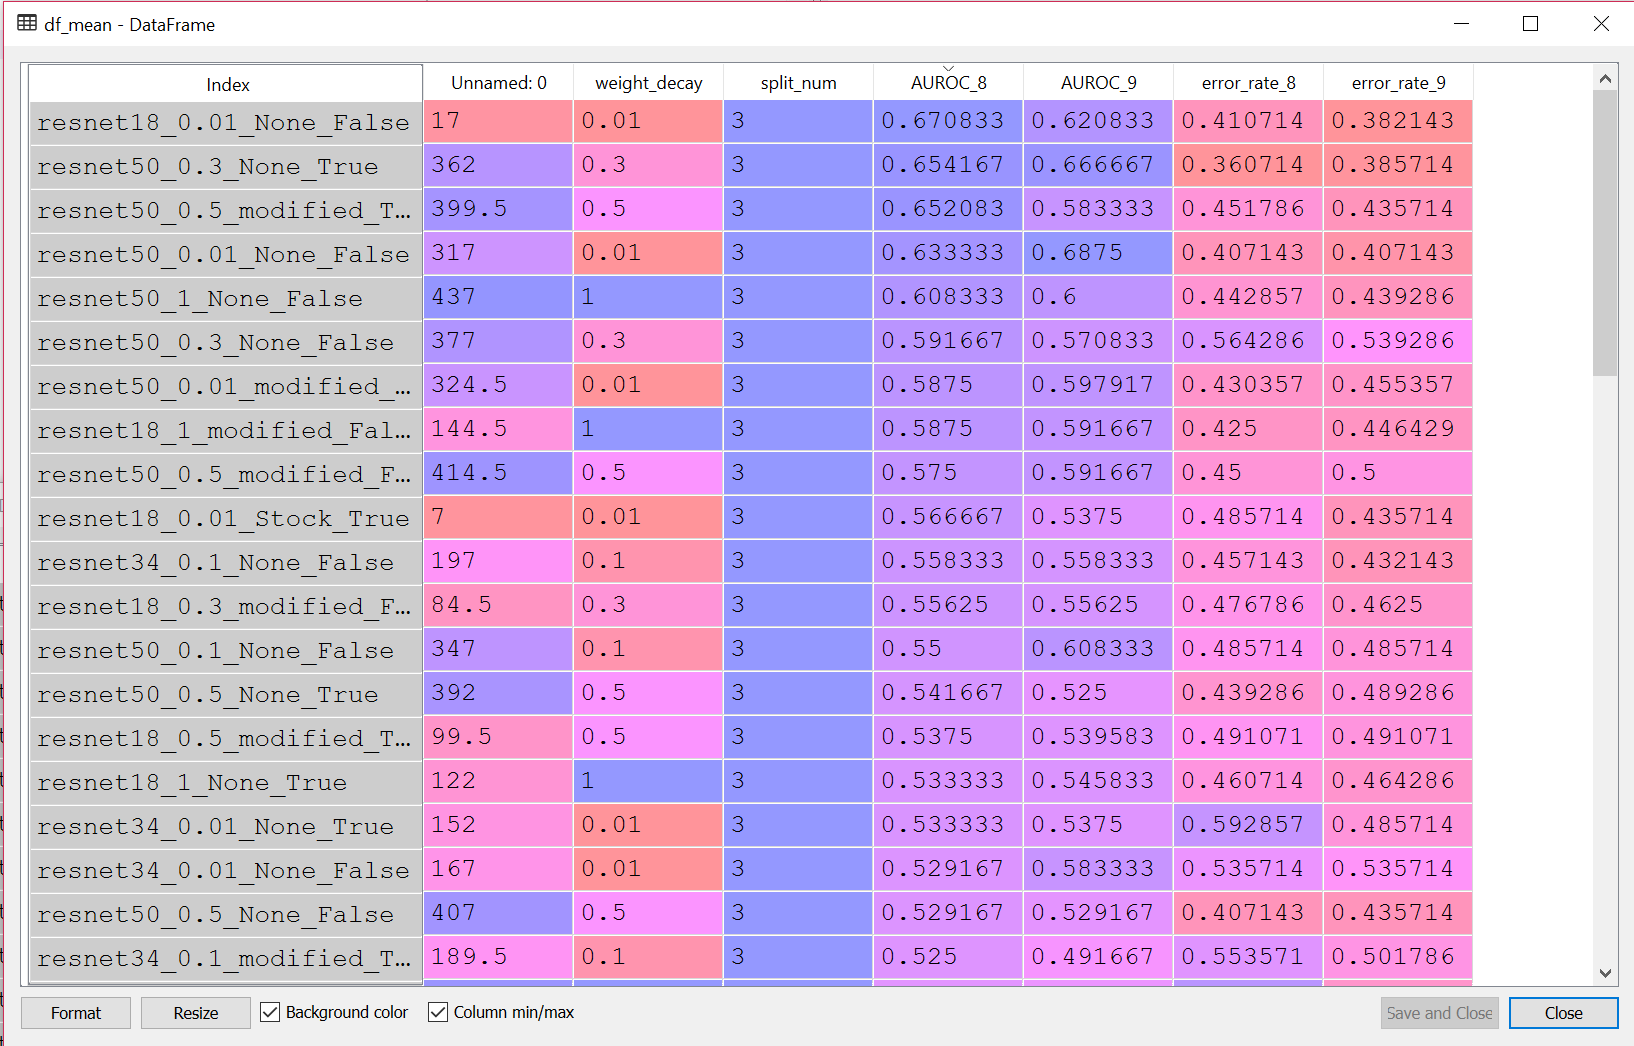

## Best Results
* Resnet18
* No Transforms
* wd = 0.01
* 9 epochs
* normalization off
* max lr not set

[Search for Repeated Stratified K-Fold on best results](Previous%20best%20and%20new%20hyperparameter%20search.ipynb)

# Devils Advocate Testing
## Hypothesis: Flip day 1 gender

In [137]:
def changegend(row):
    index = row.name
    gend = row['sex']
    if index < 55:
        if gend=='Female':
            newgend = 'Male'
        if gend=='Male':
            newgend = 'Female'
    else:
        newgend = gend
    return (newgend)

df_swapped = pd.DataFrame(df_Test_Train)
df_swapped['sex'] = df_swapped.apply(changegend, axis = 1)
df_swapped.head(100)
    

,Crp_Filepath,clutch,Day,egg_number,sex
0,Cropped_Egg_images/Clutch1_D18/egg2.JPG,1,18,2,Male
1,Cropped_Egg_images/Clutch1_D18/egg3.JPG,1,18,3,Male
2,Cropped_Egg_images/Clutch1_D18/egg4.JPG,1,18,4,Female
3,Cropped_Egg_images/Clutch1_D18/egg6.JPG,1,18,6,Male
4,Cropped_Egg_images/Clutch1_D18/egg9.JPG,1,18,9,Male
5,Cropped_Egg_images/Clutch1_D18/egg11.JPG,1,18,11,Male
6,Cropped_Egg_images/Clutch1_D18/egg15.JPG,1,18,15,Male
7,Cropped_Egg_images/Clutch1_D18/egg16.JPG,1,18,16,Female
8,Cropped_Egg_images/Clutch1_D18/egg17.JPG,1,18,17,Male
9,Cropped_Egg_images/Clutch1_D18/egg19.JPG,1,18,19,Female


######################################################

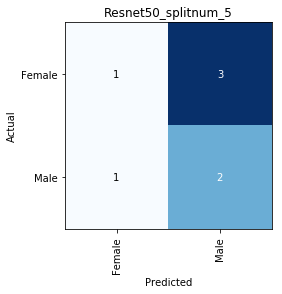

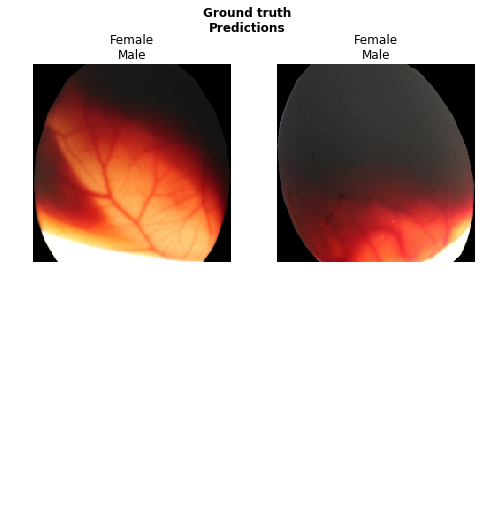

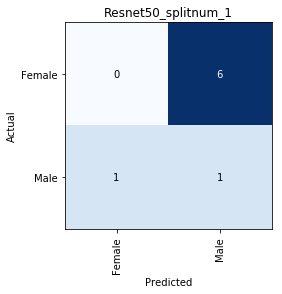

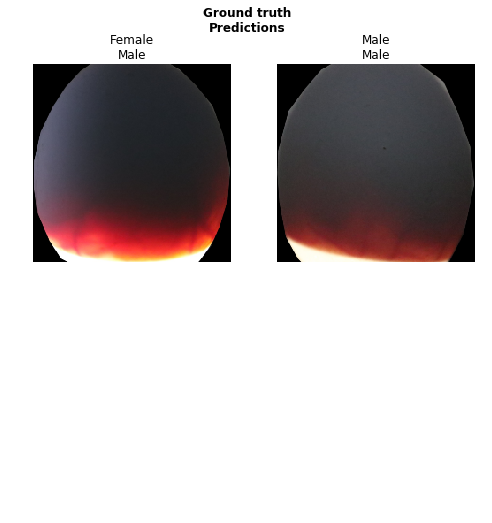

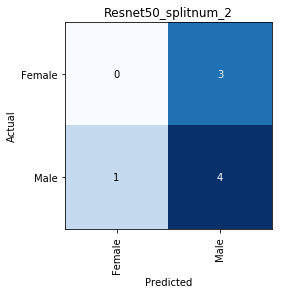

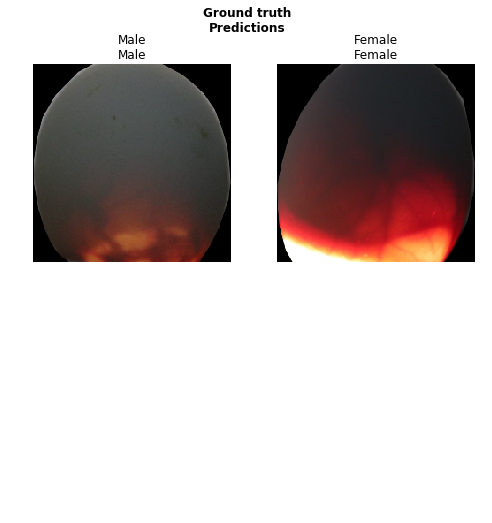

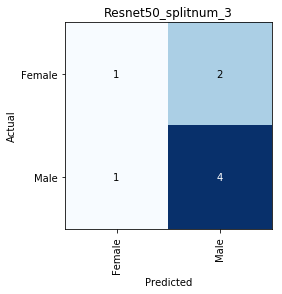

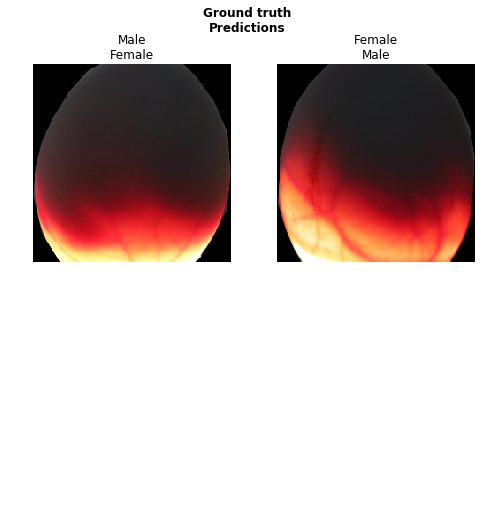

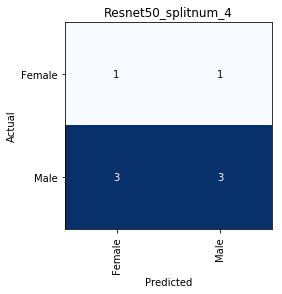

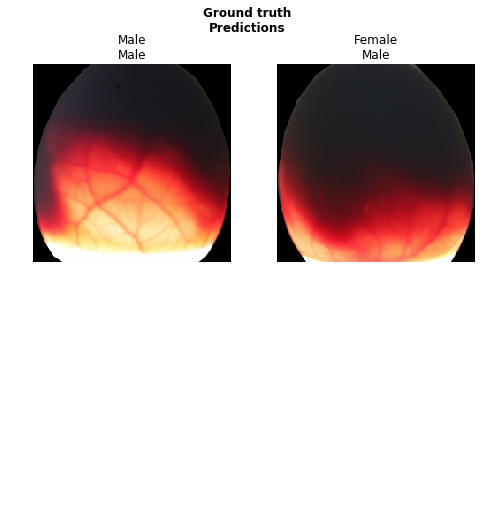

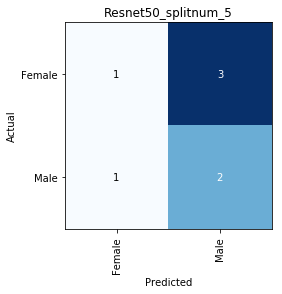

In [154]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
from sklearn.model_selection import StratifiedKFold
np.random.seed(42)
tfms = get_transforms(do_flip = True, flip_vert = False, max_rotate = 35, max_lighting = None, max_warp = .2, p_lighting = 0)
kf = KFold(n_splits=5)
#skf = StratifiedKFold(n_splits=5, shuffle = False)

acc_val = []
split_num = 1
## Attempt to use Just Clutch2 Data
df_Test_Train_Clutch2 = df_Test_Train[55:]
#df_Test_Train_Clutch1 = df_Test_Train[:55]
#for train_index, val_index in skf.split(df_Test_Train.index, df_Test_Train['sex']):
#for train_index, val_index in kf.split(df_Test_Train.index):
#for train_index, val_index in kf.split(df_Test_Train_Clutch2.index):
for train_index, val_index in kf.split(df_swapped.index):
    print(train_index, val_index)
    test_name = ("Resnet50_splitnum_" + str(split_num))
    data_fold = (ImageList.from_df(df_Test_Train,'/home/jplineb/Chicken_Proj')
                 .split_by_idxs(train_index, val_index)
                 .label_from_df(cols='sex')
                 .transform(tfms, size=224)
                 .databunch(bs = 2)).normalize()
    learn = cnn_learner(data_fold, models.resnet18, metrics=error_rate, wd=.01)
    learn.save(test_name)
    learn.fit_one_cycle(7)
    loss, acc = learn.validate()
    learn.show_results()
    interp = ClassificationInterpretation.from_learner(learn)
    interp.plot_confusion_matrix(return_fig=True, title =test_name)
    acc_val.append(acc.numpy())
    split_num +=1

In [152]:
print('Average error rate:' + str(1-np.average(acc_val)))
print('Standard error bounds:' + str(np.std(acc_val)/np.sqrt(5)))

Average error rate:0.44502925872802734
Standard error bounds:0.046331143165237905


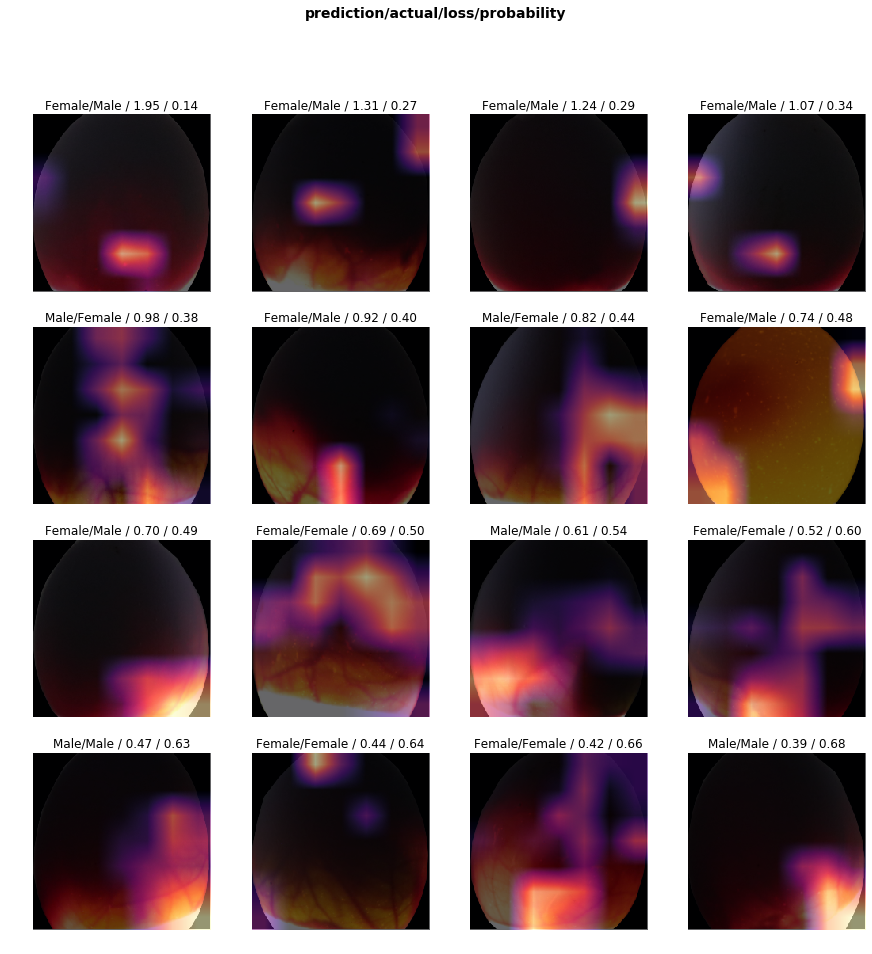

In [61]:
interp = ClassificationInterpretation.from_learner(learn.load('Resnet50_splitnum_5'))

interp.plot_top_losses(16, figsize=(15,15))

## K-Fold Stratified Shuffle